**1. How does the revenue generated from document registration vary across districts in Telangana? List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.**



---


*Total Registration Revenue across Districts*





---



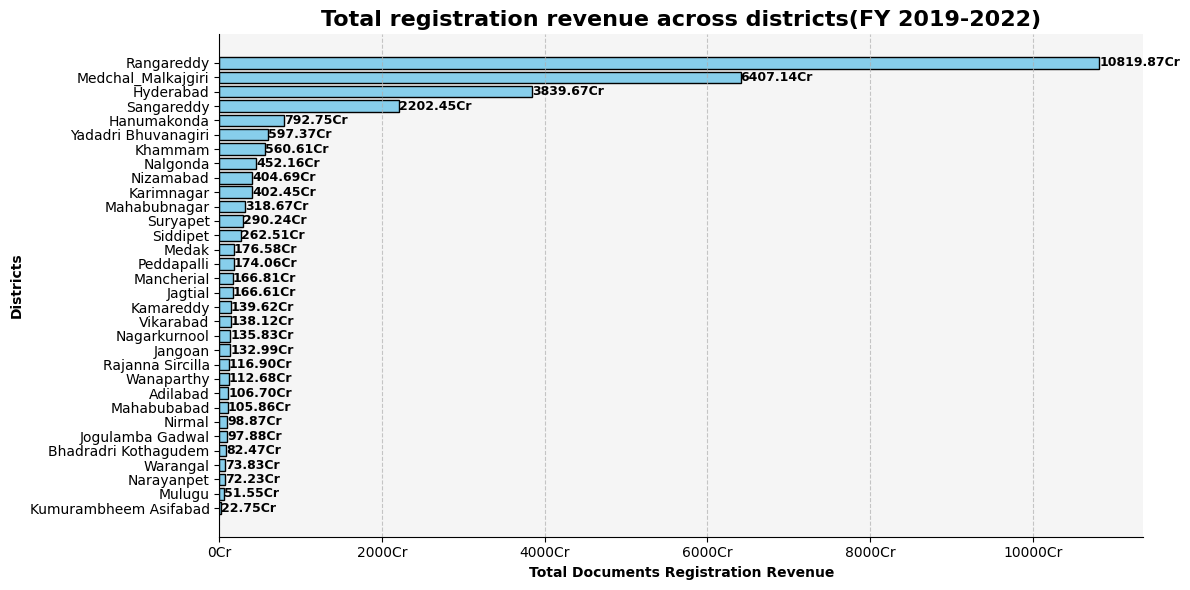

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dim_districts_df=pd.read_csv("dim_districts.csv")
fact_stamps_df=pd.read_csv("fact_stamps.csv")

df=fact_stamps_df.merge(dim_districts_df,on='dist_code',how='left')
district_revenue=df.groupby('district')['documents_registered_rev'].sum().sort_values(ascending=True)

fig,ax=plt.subplots(figsize=(12,6))
bars=ax.barh(district_revenue.index,district_revenue,color='skyblue',edgecolor="black")
def custom_formatter(x,pos):
  return f'{x/10000000:.0f}Cr'
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
plt.xlabel("Total Documents Registration Revenue",fontweight='bold')
plt.ylabel("Districts",fontweight="bold")
plt.title("Total registration revenue across districts(FY 2019-2022)",fontdict={'fontsize':16,'fontweight':'bold'})
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
for i,v in  enumerate(district_revenue):
  plt.text(v,i,f'{v/10000000:.2f}Cr',va='center',color="black",fontweight="bold",fontsize=9)
ax.grid(axis='x',linestyle='--',alpha=0.7)
ax.set_facecolor('#F5F5F5')
plt.tight_layout()
plt.show()



---
*Top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.*


---



<ipython-input-16-06e42f6de245>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}%'.format(x)for x in plt.gca().get_xticks()])


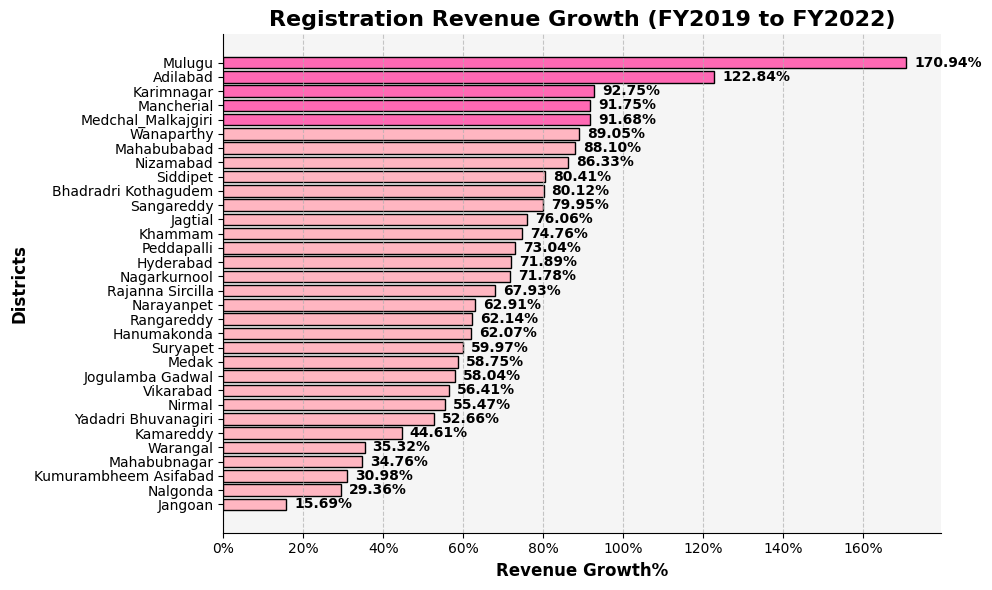

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dim_districts_df=pd.read_csv("dim_districts.csv")
fact_stamps_df=pd.read_csv("fact_stamps.csv")

df=fact_stamps_df.merge(dim_districts_df,on='dist_code',how='left')
district_revenue=df.groupby('district')['documents_registered_rev'].sum()
district_revenue=district_revenue.sort_values(ascending=True)
df_2019=df[(df['month']>='2019-04-01') & (df["month"]<='2020-03-01')]
df_2022=df[(df["month"]>="2022-04-01") & (df["month"]<="2023-03-01")]
revenue_2019=df_2019.groupby("district")["documents_registered_rev"].sum()
revenue_2022=df_2022.groupby("district")["documents_registered_rev"].sum()
growth=(revenue_2022-revenue_2019)/revenue_2019*100
growth=growth.sort_values(ascending=True)
fig,ax=plt.subplots(figsize=(10,6))
top_5=growth.index[-5:]
bars=ax.barh(growth.index,growth,color=np.where(growth.index.isin(top_5),'hotpink',"lightpink"),edgecolor="black")
for bar in bars:
  yval=bar.get_width()
  ax.text(yval+2,bar.get_y()+bar.get_height()/2,f'{yval:.2f}%',va='center',color='black',fontweight='bold')
plt.gca().set_xticklabels(['{:.0f}%'.format(x)for x in plt.gca().get_xticks()])
plt.title('Registration Revenue Growth (FY2019 to FY2022)',fontsize=16,fontweight='bold')
plt.xlabel('Revenue Growth%',fontsize=12,fontweight='bold')
plt.ylabel('Districts',fontsize=12,fontweight='bold')
ax.grid(axis='x',linestyle='--',alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_facecolor('#F5F5F5')
plt.tight_layout()
plt.show()




---

*Ploting top 5 districts that have highest revenue in FY 2019-2022 on Telangana Map*

---



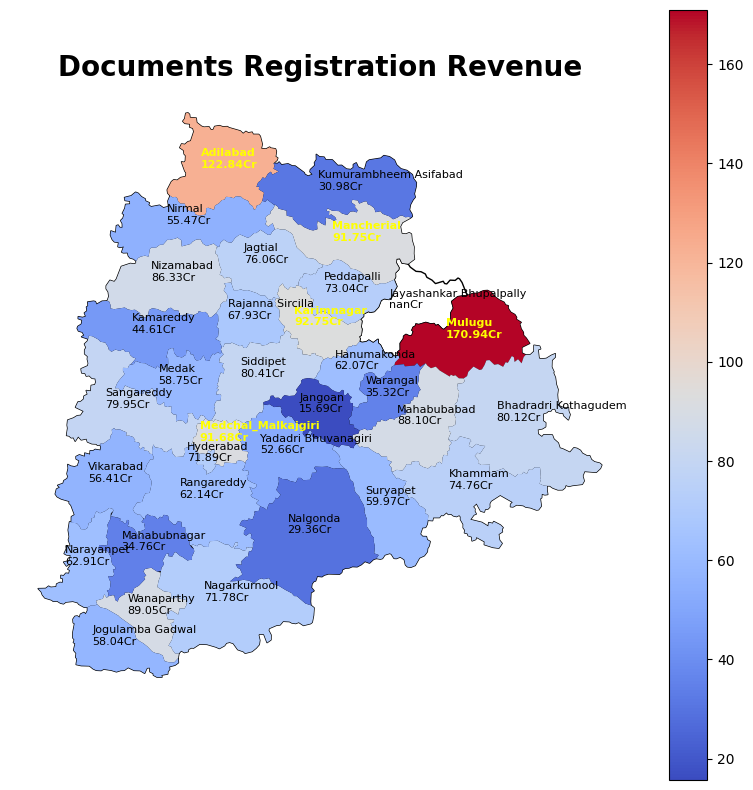

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

gdf=gpd.read_file("telangana_district_map.json")
dim_districts_df=pd.read_csv("dim_districts.csv")
fact_stamps_df=pd.read_csv("fact_stamps.csv")


df=fact_stamps_df.merge(dim_districts_df,on='dist_code',how='left')
merged_df=pd.merge(df,gdf,left_on='district',right_on="New_Distri",how='inner')
merged_gdf_revenue=gdf.merge(growth,left_on='New_Distri',right_on=growth.index,how='left')
merged_gdf_revenue=merged_gdf_revenue.sort_values(by='documents_registered_rev',ascending=False)

top_five_districts=merged_gdf_revenue.head(5)
merged_gdf_revenue['is_top_five']=merged_gdf_revenue['New_Distri'].isin(top_five_districts['New_Distri'])

fig,ax=plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,edgecolor='k',facecolor='none')
merged_gdf_revenue.plot(column='documents_registered_rev',cmap='coolwarm',ax=ax,legend=True)
plt.axis('off')
ax.set_title('Documents Registration Revenue',fontsize=20,fontweight='bold')
bold_font=FontProperties(weight='bold')
for x,y,label,rev_value,is_top_five in zip(merged_gdf_revenue.geometry.centroid.x,
                                           merged_gdf_revenue.geometry.centroid.y,
                                           merged_gdf_revenue['New_Distri'],
                                           merged_gdf_revenue['documents_registered_rev'],
                                           merged_gdf_revenue['is_top_five']):
  color='yellow' if is_top_five else 'black'
  text=ax.annotate(f'{label}\n{rev_value:.2f}Cr',xy=(x-0.15,y),fontsize=8,color=color,fontproperties=bold_font
                   if is_top_five else None)
plt.show()


**2. How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?**



---

*Revenue generated from document registration compared to the revenue generated from e-stamp challans across districts*

---



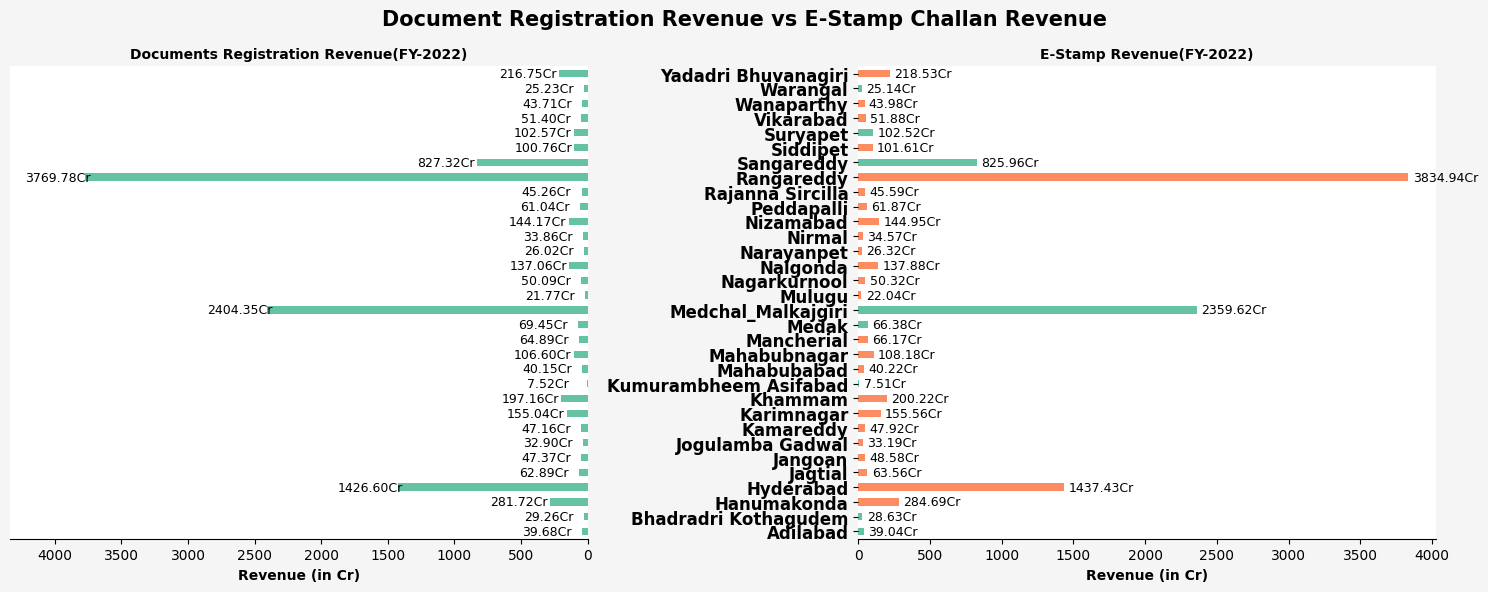

In [ ]:
#import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties
import seaborn as sns

dim_districts_df = pd.read_csv('dim_districts.csv')
fact_stamps_df = pd.read_csv('fact_stamps.csv')
gdf=gpd.read_file("telangana_district_map.json")
df = fact_stamps_df.merge(dim_districts_df, on='dist_code', how='left')
df = df[df['month'] >= '2022-04-01']

rev_doc = df.groupby('district')['documents_registered_rev'].sum()
rev_estamp = df.groupby('district')['estamps_challans_rev'].sum()
rev_doc = rev_doc / 10000000
rev_estamp = rev_estamp / 10000000

merged_rev_doc=pd.merge(rev_doc,gdf,left_on='district',right_on="New_Distri",how='inner')

palette=sns.color_palette('Set2')

fig,axes=plt.subplots(1,2,figsize=(15,6))
plt.suptitle('Document Registration Revenue vs E-Stamp Challan Revenue',fontsize=15,fontweight='bold')
ax1=rev_doc.plot(kind='barh', ax=axes[0],color=palette[0])
ax1.set_xlabel('Revenue (in Cr)',fontsize=10,fontweight='bold')
ax1.set_ylabel("")
ax1.set_title("Documents Registration Revenue(FY-2022)",fontsize=10,fontweight='bold')
ax1.invert_xaxis()
ax1.margins(0.15,0.05)
ax1.set_yticklabels([])
ax1.set_yticks([])


ax2=rev_estamp.plot(kind="barh",ax=axes[1],color=palette[1])
ax2.set_xlabel("Revenue (in Cr)",fontsize=10,fontweight='bold')
ax2.set_ylabel('')
ax2.set_title("E-Stamp Revenue(FY-2022)",fontsize=10,fontweight="bold")
ax2.set_yticklabels(rev_estamp.index,fontsize=12,fontweight='bold')

for p in ax1.patches:
  width=p.get_width()
  ax1.annotate(f'{width:.2f}Cr',(width+450,p.get_y()+p.get_height()/2),va='center',fontsize=9,color="black")

for p in ax2.patches:
  width=p.get_width()
  ax2.annotate(f'{width:.2f}Cr',(width+30,p.get_y()+p.get_height()/2),va='center',fontsize=9,color="black")
plt.tight_layout()
sns.despine(left=True,bottom=False)

for i,(doc,estamp) in enumerate(zip(rev_doc,rev_estamp)):
  if estamp>doc:
    ax2.patches[i].set_facecolor(color=palette[1])
  else:
    ax2.patches[i].set_facecolor(color=palette[0])
fig.set_facecolor('#F5F5F5')
plt.show()



---

Top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022

---



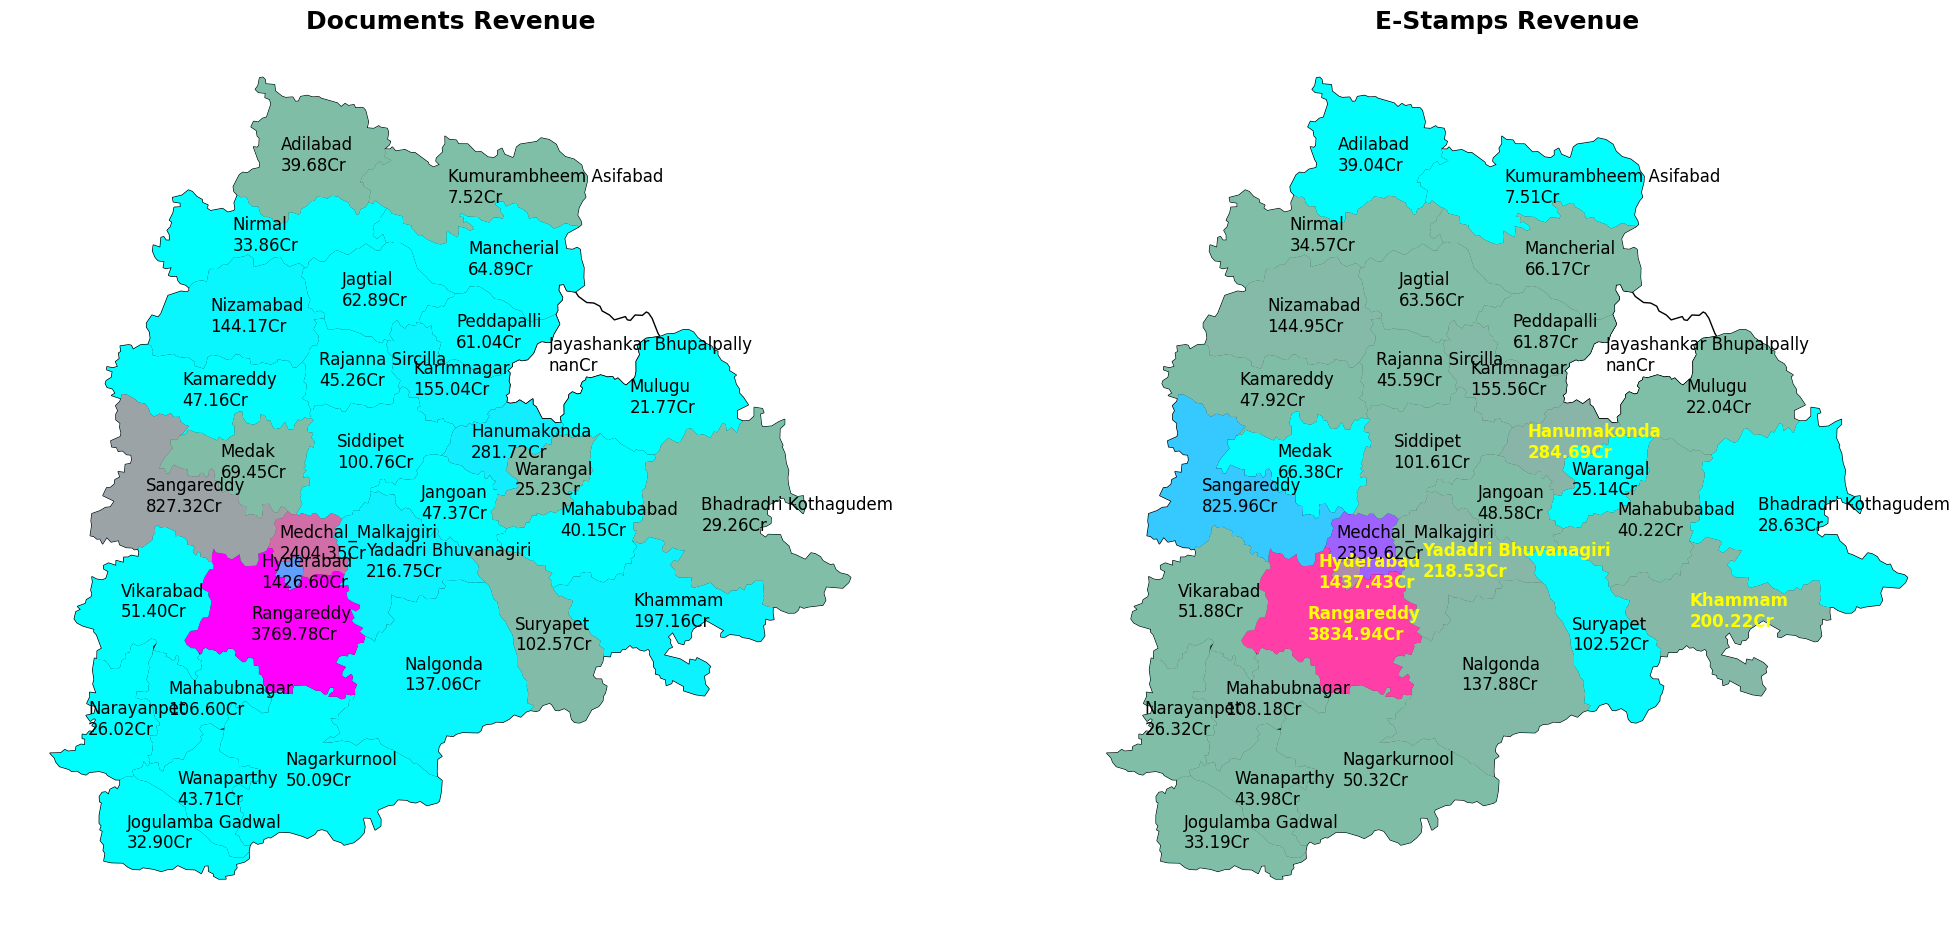

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

dim_districts_df = pd.read_csv('dim_districts.csv')
fact_stamps_df = pd.read_csv('fact_stamps.csv')
gdf = gpd.read_file("telangana_district_map.json")
df = fact_stamps_df.merge(dim_districts_df, on='dist_code', how='left')
df = df[df['month'] >= '2022-04-01']

rev_doc = df.groupby('district')['documents_registered_rev'].sum()
rev_estamp = df.groupby('district')['estamps_challans_rev'].sum()
rev_doc = rev_doc / 10000000
rev_estamp = rev_estamp / 10000000

merged_rev_doc = pd.merge(gdf, rev_doc, left_on='New_Distri', right_on="district", how='left')
merged_rev_doc = pd.merge(merged_rev_doc, rev_estamp, left_on="New_Distri", right_on=rev_estamp.index, how='left')

merged_df = gpd.GeoDataFrame(merged_rev_doc, geometry='geometry')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 18))

gdf.plot(ax=ax1, edgecolor='k', facecolor='none')
merged_rev_doc.plot(column='documents_registered_rev', cmap='cool', ax=ax1, legend=False)
merged_rev_doc[merged_rev_doc['documents_registered_rev'] > merged_rev_doc['estamps_challans_rev']].plot(
    color='coral', ax=ax1, alpha=0.5)

ax1.set_title("Documents Revenue", fontweight='bold', fontsize=18)
for x, y, label, rev_value in zip(merged_rev_doc.geometry.centroid.x,
                                   merged_rev_doc.geometry.centroid.y,
                                   merged_rev_doc['New_Distri'],
                                   merged_rev_doc['documents_registered_rev']):
    ax1.annotate(f'{label}\n{rev_value:.2f}Cr',
                 xy=(x - 0.15, y - 0.08), color='black', fontsize=12)
ax1.axis('off')

gdf.plot(ax=ax2, edgecolor='k', facecolor='none')
merged_rev_doc.plot(column='estamps_challans_rev', cmap='cool', ax=ax2, legend=False)
merged_rev_doc[merged_rev_doc['estamps_challans_rev'] > merged_rev_doc['documents_registered_rev']].plot(
    color='coral', ax=ax2, alpha=0.5)

top_five_districts = merged_rev_doc[merged_rev_doc['estamps_challans_rev'] > merged_rev_doc['documents_registered_rev']].nlargest(5, 'estamps_challans_rev')

ax2.set_title("E-Stamps Revenue", fontweight='bold', fontsize=18)
for x, y, label, rev_value in zip(merged_rev_doc.geometry.centroid.x,
                                   merged_rev_doc.geometry.centroid.y,
                                   merged_rev_doc['New_Distri'],
                                   merged_rev_doc['estamps_challans_rev']):
    color = 'yellow' if label in top_five_districts['New_Distri'].tolist() else 'black'
    fontweight = 'bold' if label in top_five_districts['New_Distri'].tolist() else 'normal'
    ax2.annotate(f'{label}\n{rev_value:.2f}Cr',
                 xy=(x - 0.15, y - 0.08), color=color, fontsize=12, fontweight=fontweight)

ax2.axis('off')
plt.show()


**3. Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? If so, what suggestions would you propose to the government?**



---


*E-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan(Bar Graph)*

---



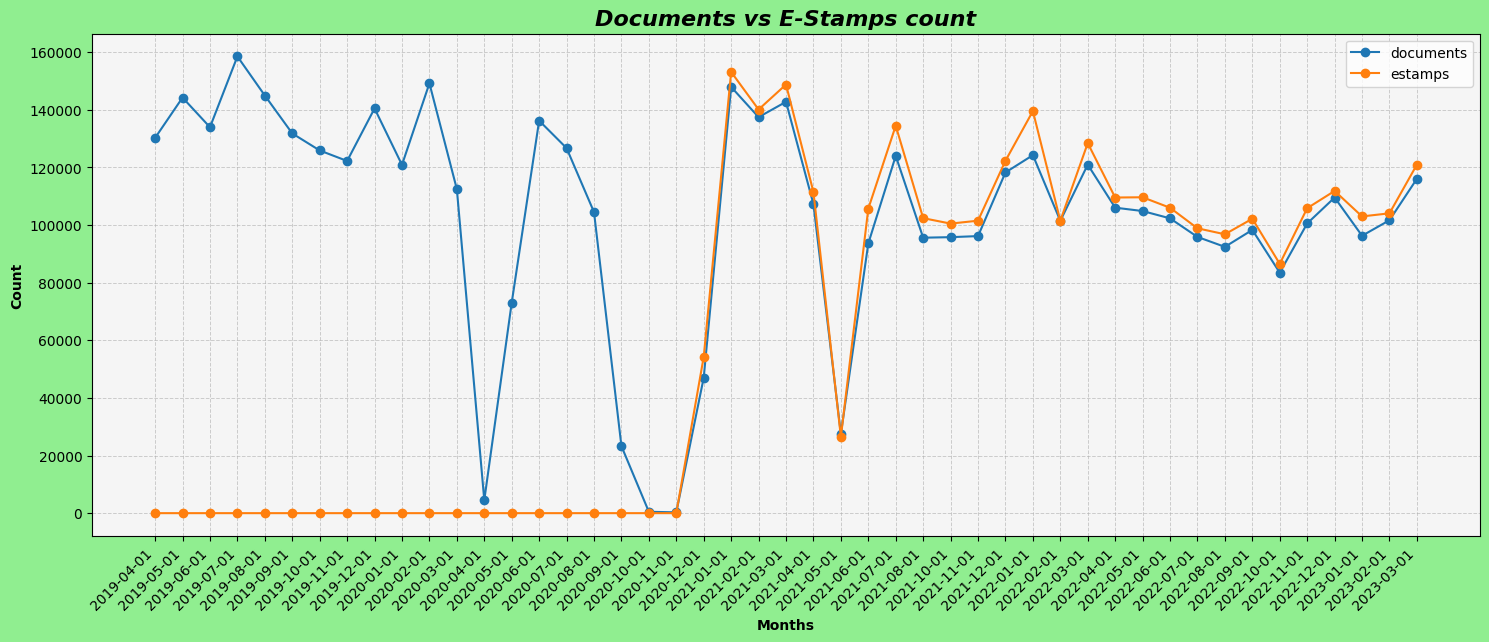

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("fact_stamps.csv")

df1=df.groupby('month')[['documents_registered_cnt','estamps_challans_cnt']].sum()
fig,ax=plt.subplots(figsize=(15,6))
df1.plot(ax=ax,marker='o',linestyle='-')
plt.title('Documents vs E-Stamps count',fontsize=16,fontstyle='italic',fontweight='bold')
plt.xlabel('Months',fontsize=10,fontweight='bold')
plt.ylabel('Count',fontsize=10,fontweight='bold')

plt.legend(['documents','estamps'])
plt.grid(True,linestyle='--',linewidth=0.7,alpha=0.6)
plt.tight_layout()

ax.set_xticks(range(len(df1.index)))
ax.set_xticklabels(df1.index,rotation=45,ha='right')
fig.patch.set_facecolor('lightgreen')
ax.set_facecolor('#F5F5F5')

plt.show()



---

E-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan (Pie Chart since December,2020)

---



Text(0.5, 1.0, 'Registration count since the implementation of estamp challans  (i.e. 01-12-2020)')

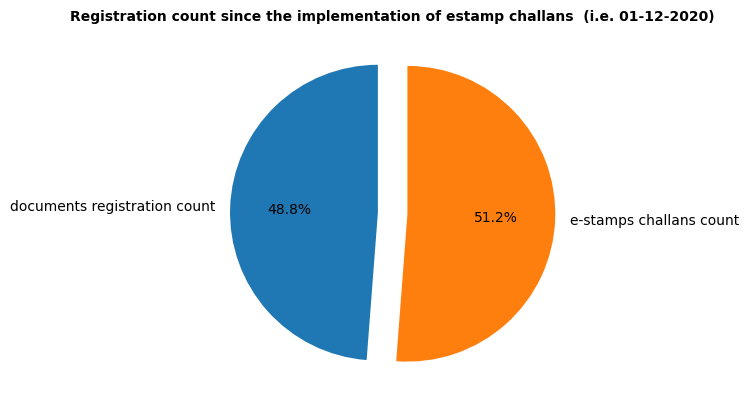

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv("fact_stamps.csv")

df1=df.groupby('month')[['documents_registered_cnt','estamps_challans_cnt']].sum()

labels=['documents registration count','e-stamps challans count']
sizes=[2786700,2925071]
plt.pie(sizes,labels=labels,explode=(0.1,0.1),autopct='%1.1f%%',startangle=90)
plt.title("Registration count since the implementation of estamp challans  (i.e. 01-12-2020)",fontsize=10,fontweight='bold')

**4. Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.**



---


*Stamp registration revenue generation during the fiscal year 2021 to 2022 (Bar Graph).*



---



<ipython-input-9-21859b9904b1>:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rev_df=df.groupby('district')['documents_registered_rev','estamps_challans_rev'].sum()


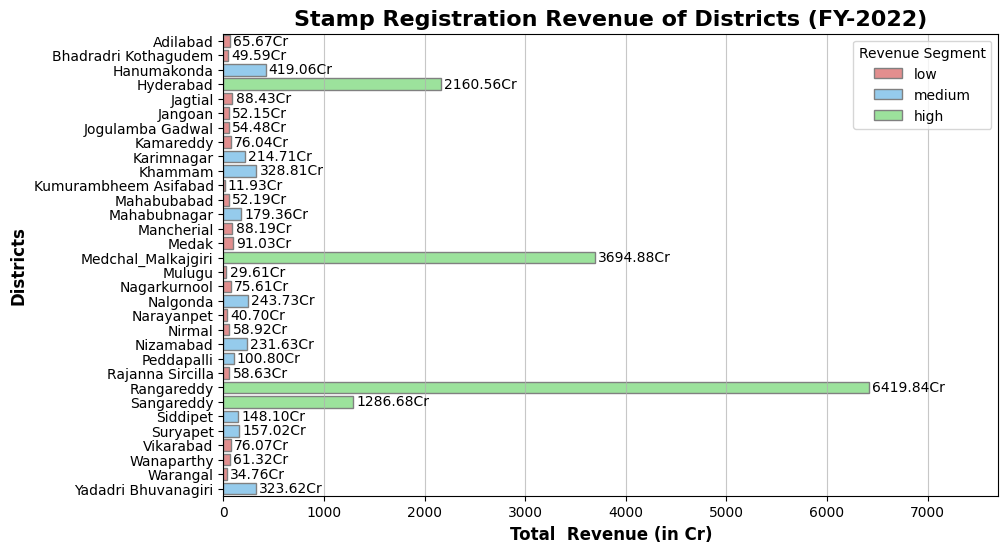

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



dim_districts_df=pd.read_csv("dim_districts.csv")
fact_stamps_df=pd.read_csv("fact_stamps.csv")
df=fact_stamps_df.merge(dim_districts_df,on='dist_code',how='left')

df=df[(df['month']>='2021-04-01') & (df['month']<='2022-03-01')]
rev_df=df.groupby('district')['documents_registered_rev','estamps_challans_rev'].sum()
rev_df['total_rev']=rev_df['documents_registered_rev']+rev_df['estamps_challans_rev']
rev_df=rev_df/10000000

labels=['low','medium','high']
bins=[10,100,1000,max(rev_df['total_rev'])]
rev_df['segment']=pd.cut(rev_df['total_rev'],bins=bins,labels=labels)


custom_palette={'low':'lightcoral','medium':'lightskyblue','high':'lightgreen'}
plt.figure(figsize=(10,6))

bar_width=0.7

ax=sns.barplot(x='total_rev',y=rev_df.index,hue='segment',data=rev_df,palette=custom_palette,edgecolor='gray',dodge=False)

plt.title('Stamp Registration Revenue of Districts (FY-2022)',fontweight='bold',fontsize=16)
plt.xlabel('Total  Revenue (in Cr)',fontweight='bold',fontsize=12)
plt.ylabel('Districts',fontweight='bold',fontsize=12)

max_value=rev_df['total_rev'].max()
plt.xlim(0,max_value+max_value*0.2)

for p in ax.patches:
  width=p.get_width()
  height=p.get_height()
  x,y=p.get_x(),p.get_y()
  ax.annotate(f'{width :.2f}Cr',(width+max_value*0.005,y+height/2),fontsize=10,va='center')

plt.legend(title='Revenue Segment',loc='upper right',fontsize=10,title_fontsize=10)
plt.grid(axis='x',linestyle='-',alpha=0.7)
plt.show()












---


*Stamp registration revenue generation during the fiscal year 2021 to 2022 (Ploting on Telangana Map).*

---



<ipython-input-11-1c381a59fe46>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rev_df=df.groupby('district')['documents_registered_rev','estamps_challans_rev'].sum()


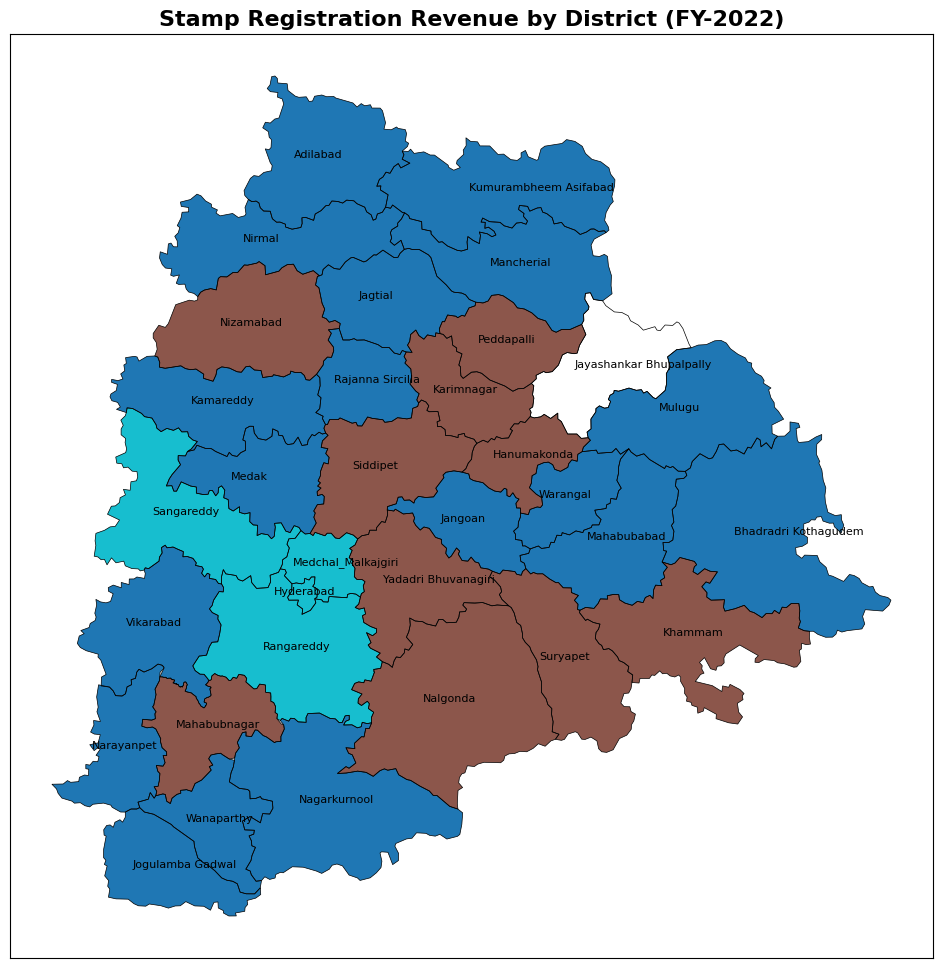

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd


gdf=gpd.read_file("telangana_district_map.json")
dim_districts_df=pd.read_csv("dim_districts.csv")
fact_stamps_df=pd.read_csv("fact_stamps.csv")
df=fact_stamps_df.merge(dim_districts_df,on='dist_code',how='left')

df=df[(df['month']>='2021-04-01') & (df['month']<='2022-03-01')]
rev_df=df.groupby('district')['documents_registered_rev','estamps_challans_rev'].sum()
rev_df['total_rev']=rev_df['documents_registered_rev']+rev_df['estamps_challans_rev']
rev_df=rev_df/10000000
conditions=[(rev_df['total_rev']<=10),(rev_df['total_rev']>10)&(rev_df['total_rev']<=100),(rev_df['total_rev']>100)]

choices=['lightgreen','lightblue','coral']
rev_df['color']=pd.cut(rev_df['total_rev'],bins=[10,100,1000,float('inf')],labels=choices)
gdf=gdf.merge(rev_df,left_on='New_Distri',right_on=rev_df.index,how='left')
fig,ax=plt.subplots(figsize=(15,12))
gdf.boundary.plot(ax=ax,color='black',linewidth=0.5)
gdf.plot(column='color',ax=ax,edgecolor='none')
for x,y,label in zip(gdf.geometry.centroid.x,
                     gdf.geometry.centroid.y,
                     gdf['New_Distri']):
  ax.annotate(label,xy=(x-0.15,y),fontsize=8,color='black')
ax.set_title('Stamp Registration Revenue by District (FY-2022)',fontweight='bold',fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()

**Transportation**

**5. Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. Are there any months or seasons that consistently show higher or lower sales rate, and if yes, what could be the driving factors? (Consider Fuel-Type category only)**



---

Months that consistently show higher or lower sales rate

---



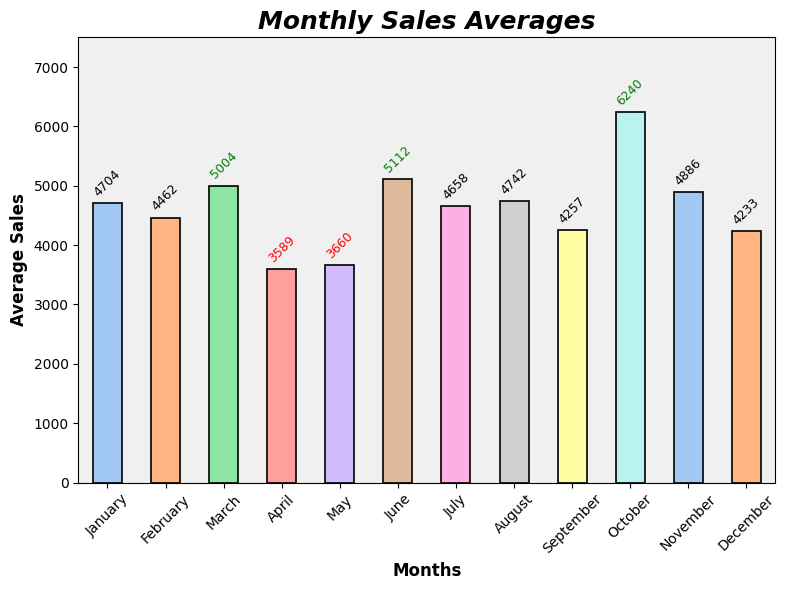

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dim_districts_df = pd.read_csv('dim_districts.csv')
fact_transport_df = pd.read_csv('fact_transport.csv')
df1 = fact_transport_df.merge(dim_districts_df, on='dist_code', how='left')
df1['month'] = pd.to_datetime(df1['month'], format='%Y-%m-%d')

df1['total'] = df1['fuel_type_petrol'] + df1['fuel_type_diesel'] + df1['fuel_type_electric'] + df1['fuel_type_others']

df = df1[['dist_code', 'month', 'district', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 'total']]

monthly_sales = df.groupby(df['month'].dt.month)['total'].mean()
monthly_sales.index = pd.to_datetime(monthly_sales.index, format='%m').strftime('%B')

plt.figure(figsize=(8, 6))
ax = plt.subplot()
ax.set_facecolor('#F0F0F0')
colors = sns.color_palette("pastel")
sorted_sales = monthly_sales.sort_values(ascending=False)
top_3_months = sorted_sales.index[:3]
last_2_months = sorted_sales.index[-2:]

bars = monthly_sales.plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=1.2)

plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Average Sales', fontsize=12, fontweight='bold')
plt.title('Monthly Sales Averages', fontsize=18, fontweight='bold', fontstyle='italic')
plt.xticks(rotation=45)
plt.ylim(0, 7500)

for i, p in enumerate(bars.patches):
    color = 'red' if monthly_sales.index[i] in last_2_months else 'green' if monthly_sales.index[i] in top_3_months else 'black'
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 70),
                 ha='center', va='bottom', fontsize=9, color=color, rotation=45)
ax.grid(False)

plt.tight_layout()
plt.show()




---

*Relation between vehicle sales and specific months or seasons in different districts*

---



<ipython-input-6-3c0f45525b6a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df['month'] = pd.to_datetime(fuel_df['month'])
<ipython-input-6-3c0f45525b6a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel_df['month'] = fuel_df['month'].dt.month


<Figure size 1000x500 with 0 Axes>

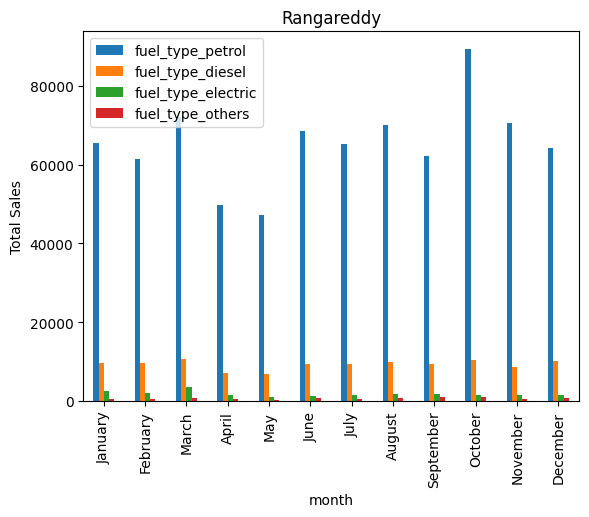

<Figure size 1000x500 with 0 Axes>

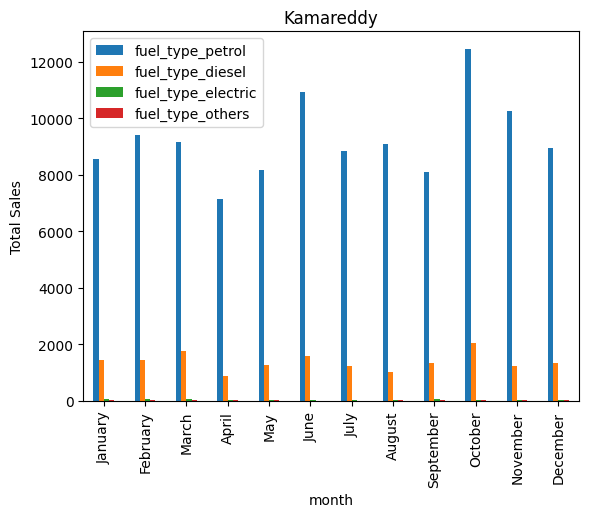

<Figure size 1000x500 with 0 Axes>

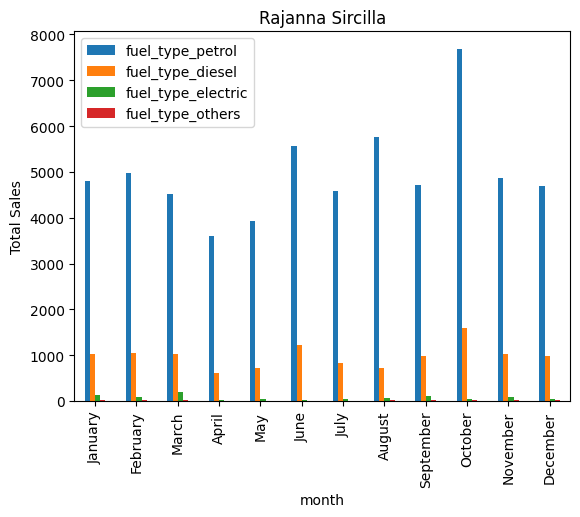

<Figure size 1000x500 with 0 Axes>

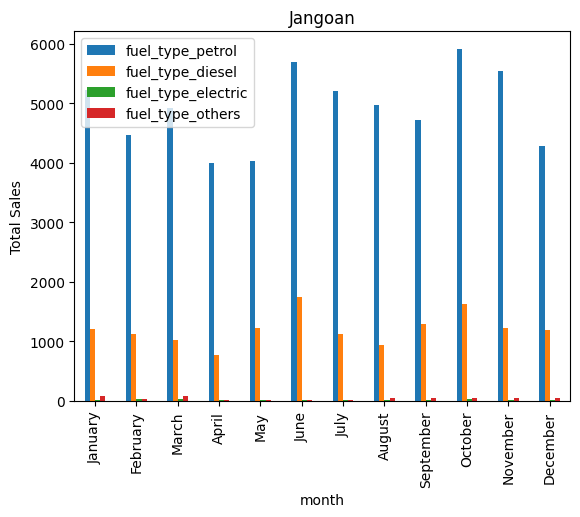

<Figure size 1000x500 with 0 Axes>

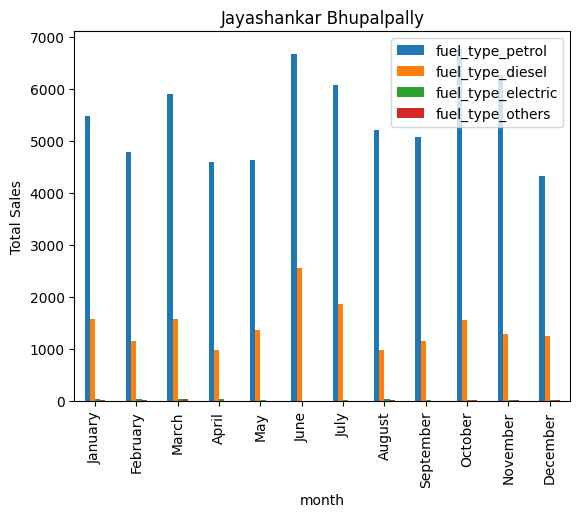

<Figure size 1000x500 with 0 Axes>

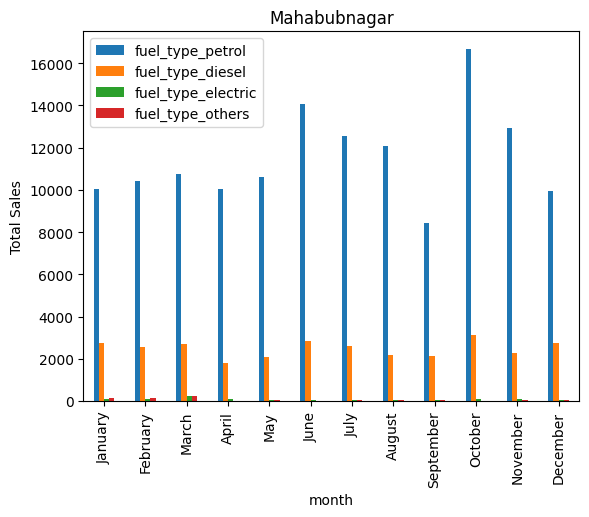

<Figure size 1000x500 with 0 Axes>

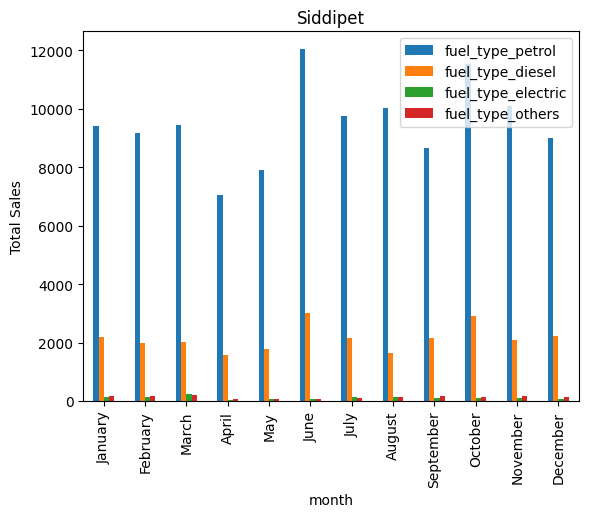

<Figure size 1000x500 with 0 Axes>

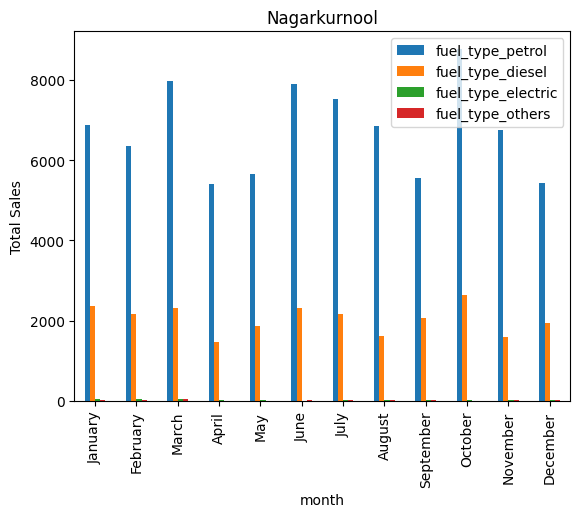

<Figure size 1000x500 with 0 Axes>

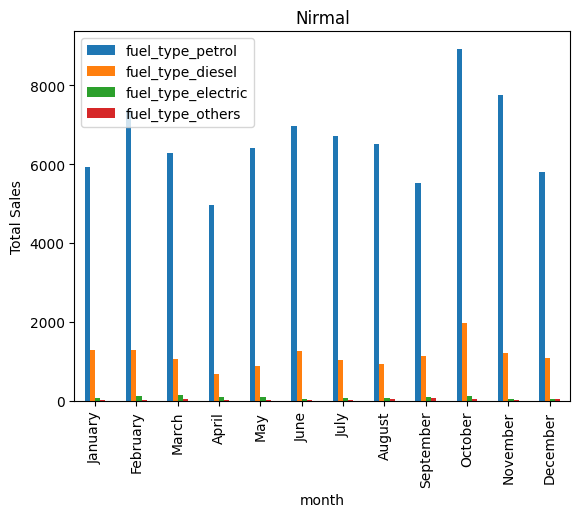

<Figure size 1000x500 with 0 Axes>

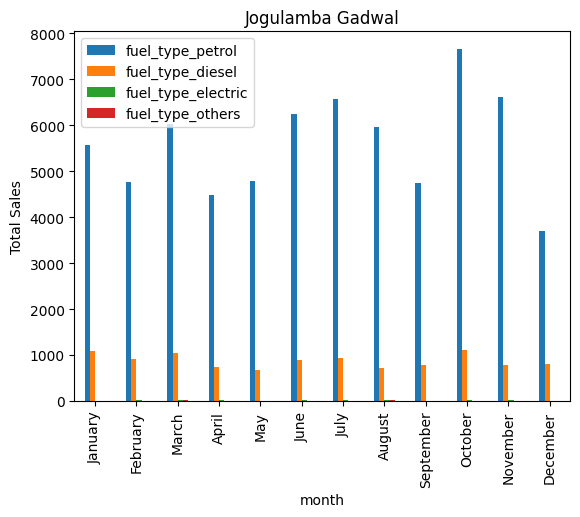

<Figure size 1000x500 with 0 Axes>

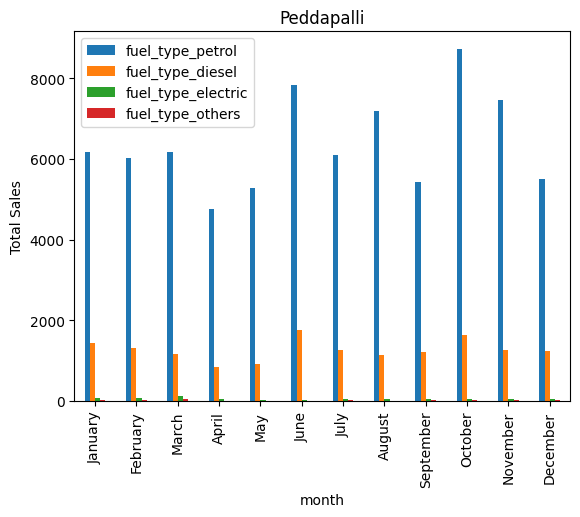

<Figure size 1000x500 with 0 Axes>

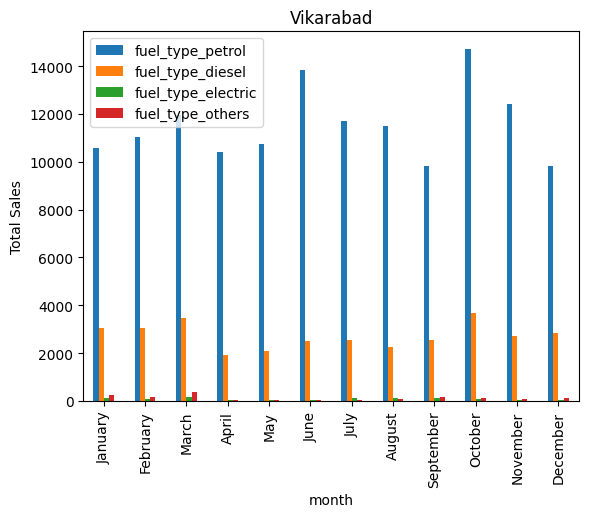

<Figure size 1000x500 with 0 Axes>

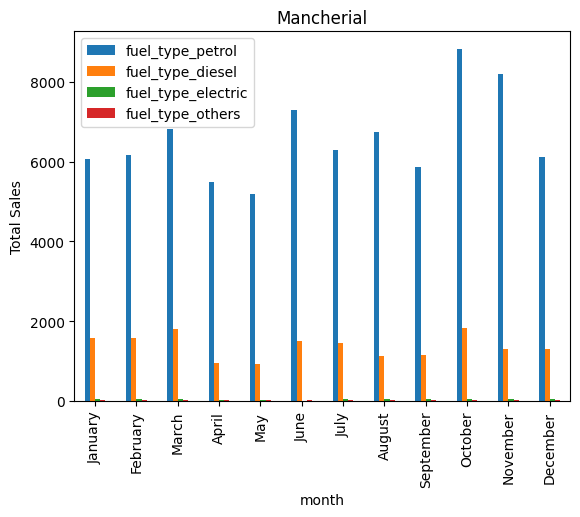

<Figure size 1000x500 with 0 Axes>

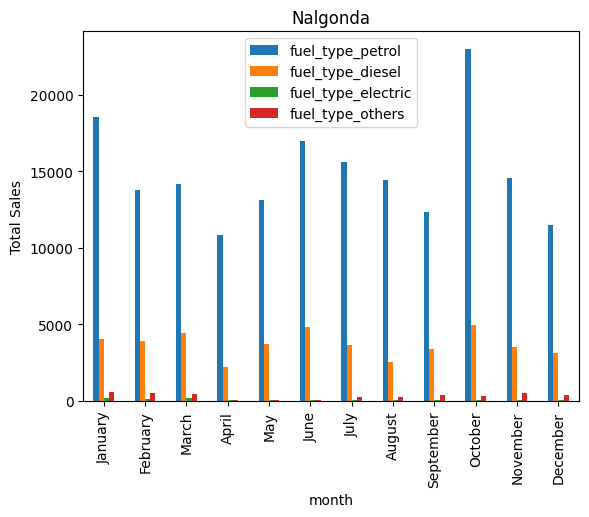

<Figure size 1000x500 with 0 Axes>

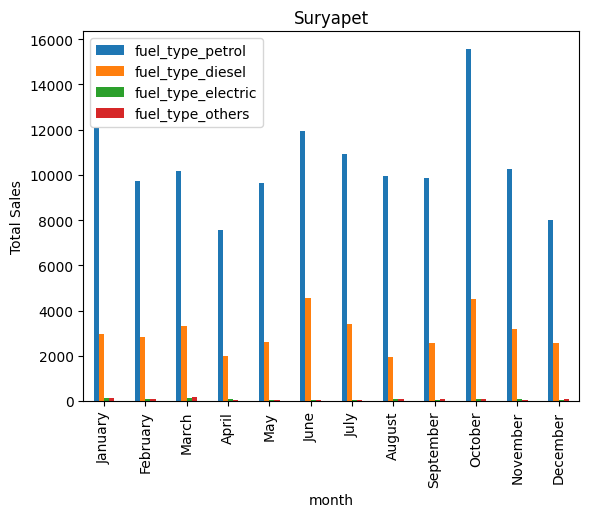

<Figure size 1000x500 with 0 Axes>

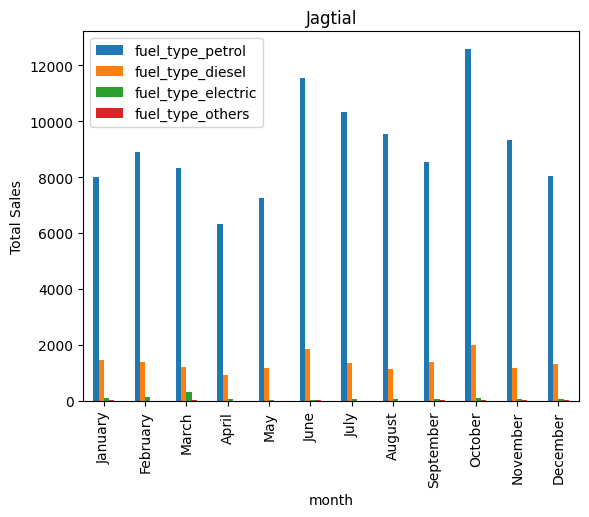

<Figure size 1000x500 with 0 Axes>

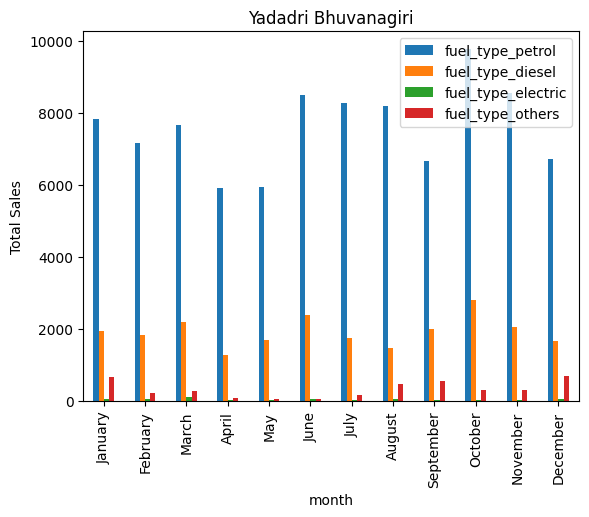

<Figure size 1000x500 with 0 Axes>

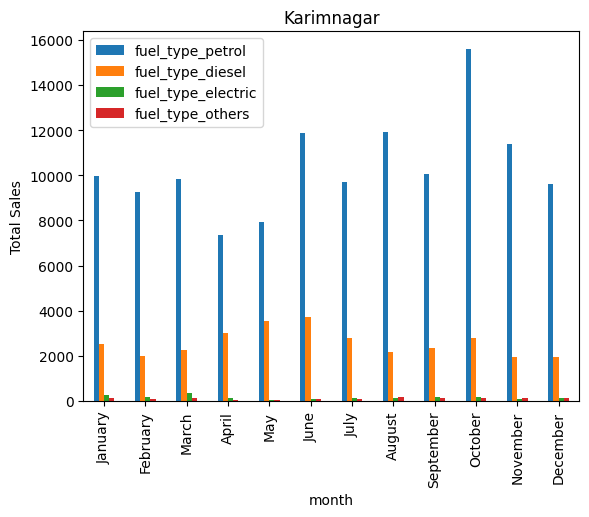

<Figure size 1000x500 with 0 Axes>

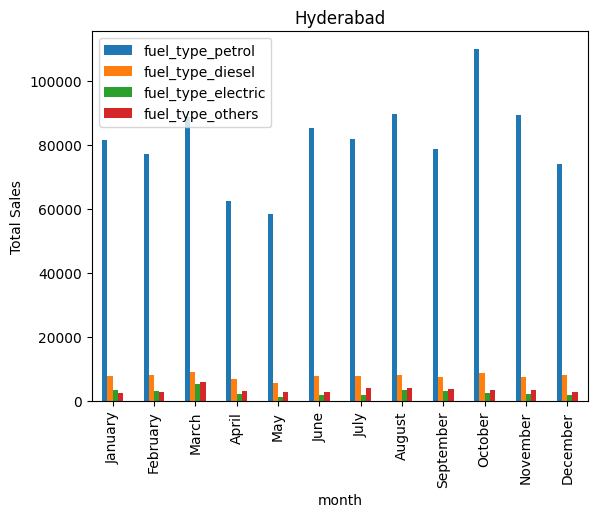

<Figure size 1000x500 with 0 Axes>

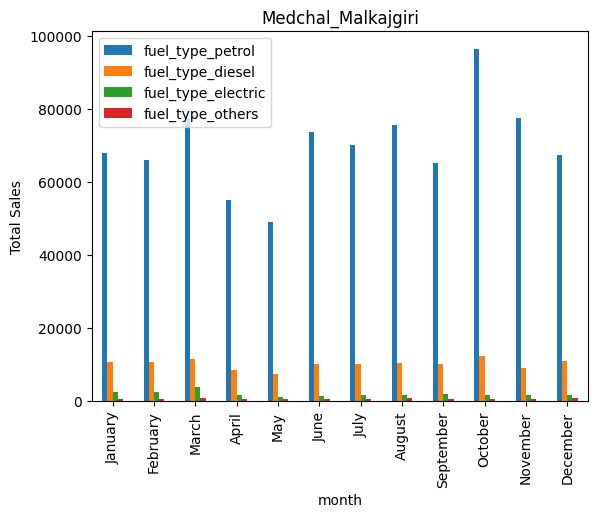

<Figure size 1000x500 with 0 Axes>

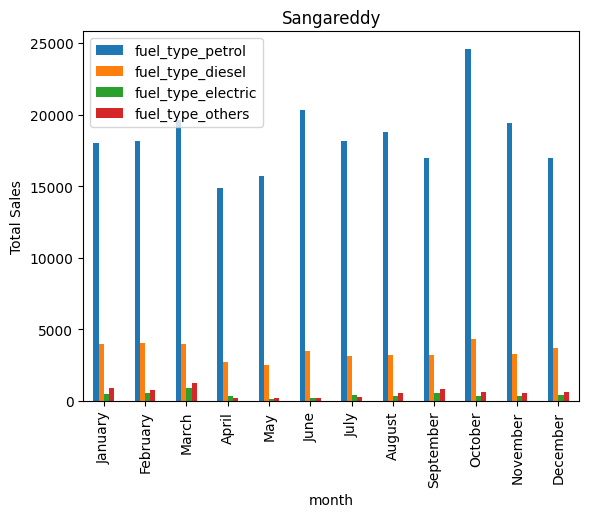

<Figure size 1000x500 with 0 Axes>

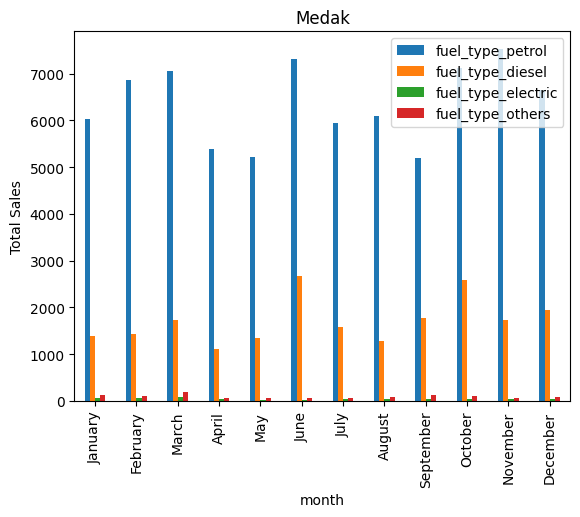

<Figure size 1000x500 with 0 Axes>

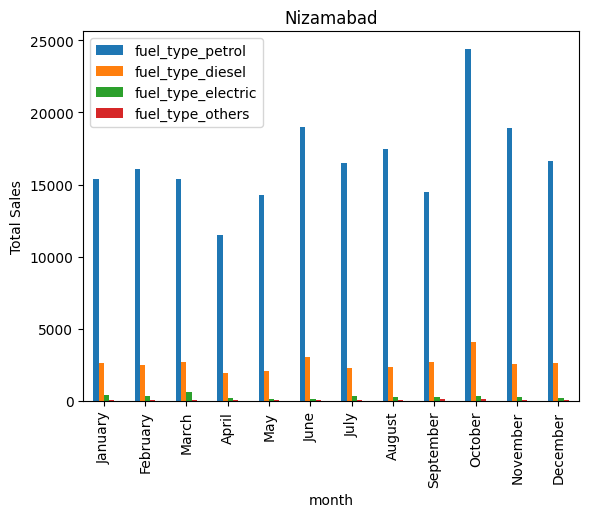

<Figure size 1000x500 with 0 Axes>

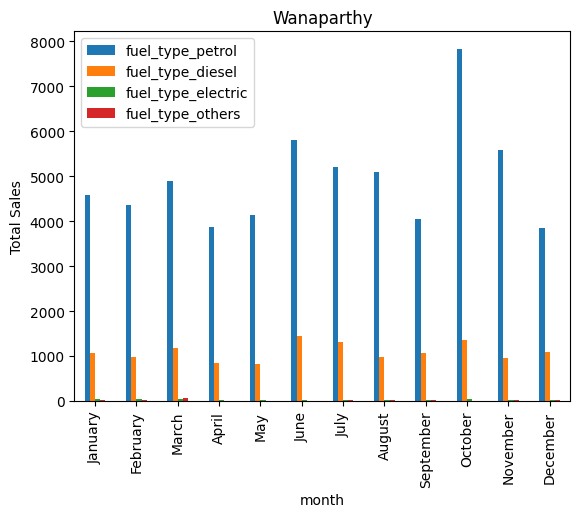

<Figure size 1000x500 with 0 Axes>

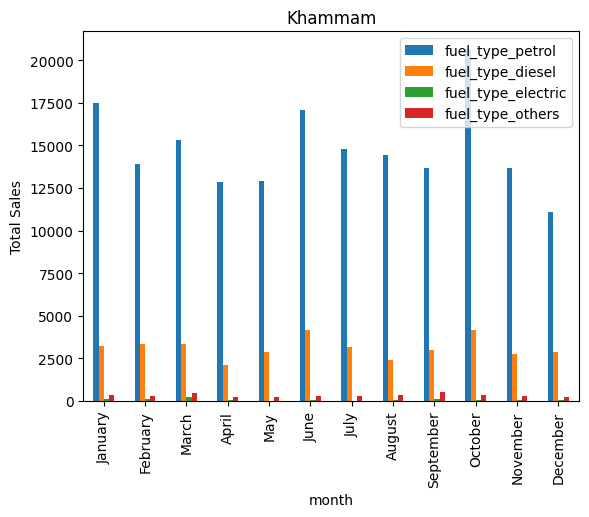

<Figure size 1000x500 with 0 Axes>

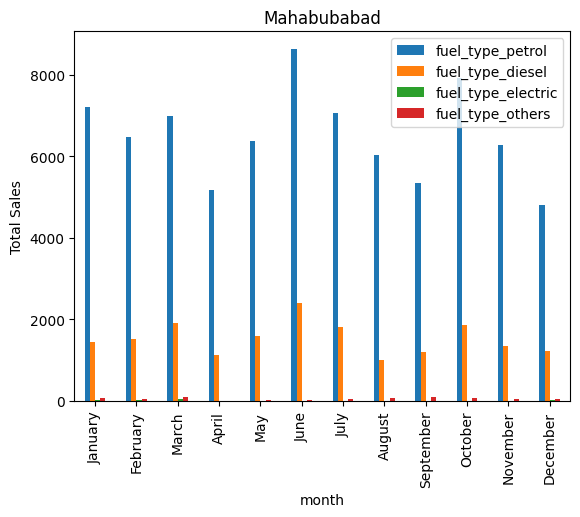

<Figure size 1000x500 with 0 Axes>

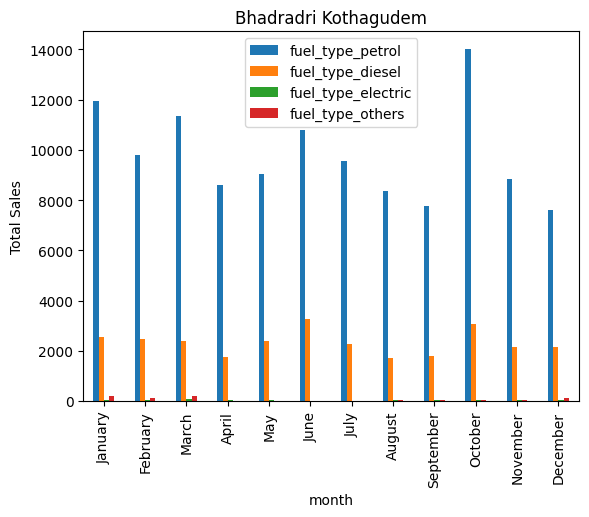

<Figure size 1000x500 with 0 Axes>

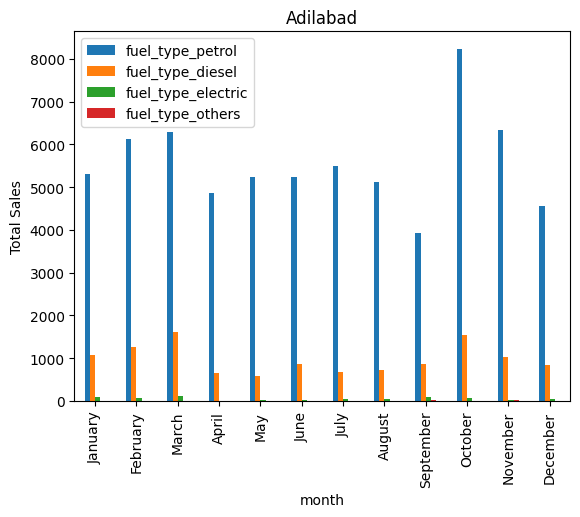

<Figure size 1000x500 with 0 Axes>

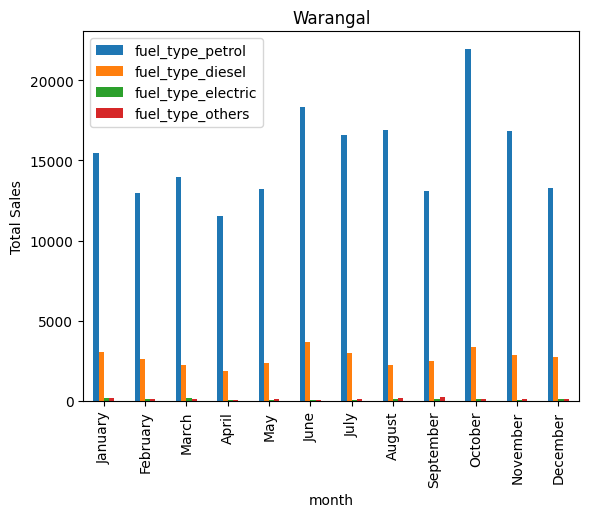

<Figure size 1000x500 with 0 Axes>

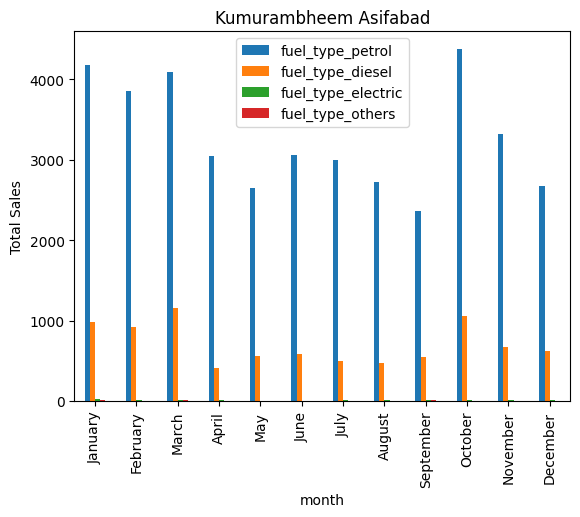

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

transport = pd.read_csv('fact_transport.csv')
districts = pd.read_csv("dim_districts.csv")
df = transport.merge(districts, on='dist_code', how='left')

fuel_df = df[['district', 'dist_code', 'month', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']]
fuel_df['month'] = pd.to_datetime(fuel_df['month'])
fuel_df['month'] = fuel_df['month'].dt.month

month_sales = fuel_df.groupby(['district', 'month'])[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']].sum().reset_index()
month_names = [calendar.month_name[i] for i in range(1, 13)]

for dist in fuel_df['district'].unique():
    dist_df = month_sales[month_sales['district'] == dist]
    plt.figure(figsize=(10, 5))
    ax = dist_df.plot(x='month', y=['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others'], kind='bar', title=dist)
    ax.set_xticklabels(month_names)

    plt.ylabel('Total Sales')
    plt.show()


**6. How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.**





---

*Predominant preference for a specific vehicle class*

---



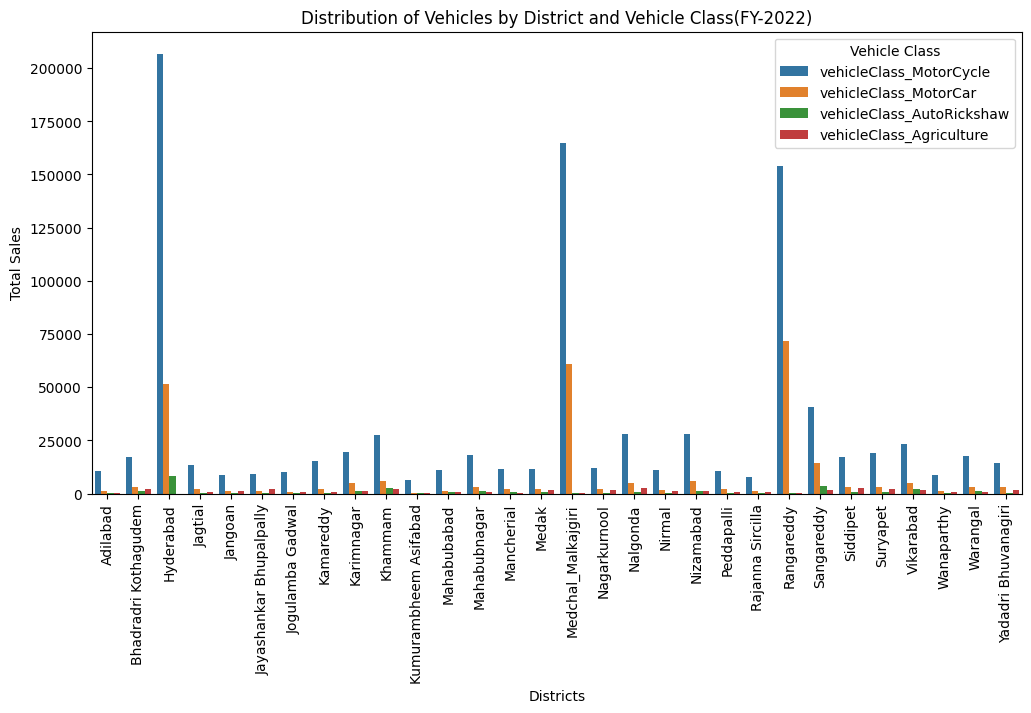

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

transport=pd.read_csv('fact_transport.csv')
districts=pd.read_csv('dim_districts.csv')
df=transport.merge(districts,on='dist_code',how='left')
df['month']=pd.to_datetime(df['month'],format='%Y-%m-%d')
df=df[(df['month']>='2022-04-01') & (df['month']<='2023-03-01')]

district_vehicle_sales=df.groupby('district').agg({'vehicleClass_MotorCycle':'sum',
                                                   'vehicleClass_MotorCar':'sum',
                                                   'vehicleClass_AutoRickshaw':'sum',
                                                   'vehicleClass_Agriculture':'sum'}).reset_index()

melted_df=pd.melt(district_vehicle_sales,id_vars='district',var_name='Vehicle Class',value_name='Total Sales')
plt.figure(figsize=(12,6))
sns.barplot(data=melted_df,x='district',y='Total Sales',hue='Vehicle Class')
plt.xlabel('Districts')
plt.title("Distribution of Vehicles by District and Vehicle Class(FY-2022)")
plt.xticks(rotation=90)
plt.legend(title='Vehicle Class')
plt.show()


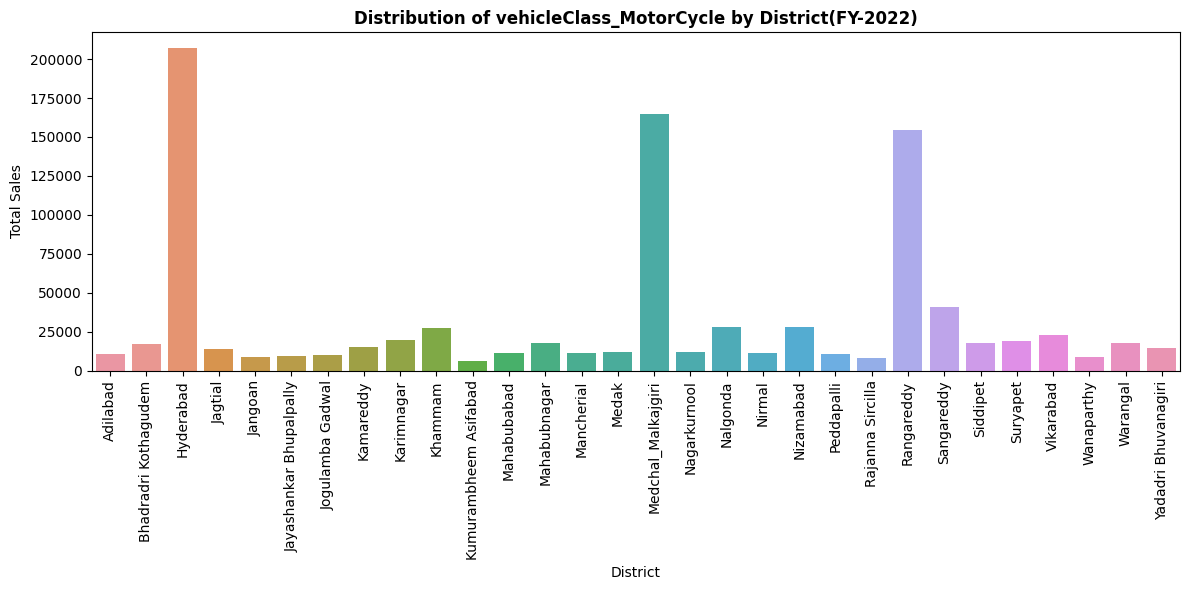

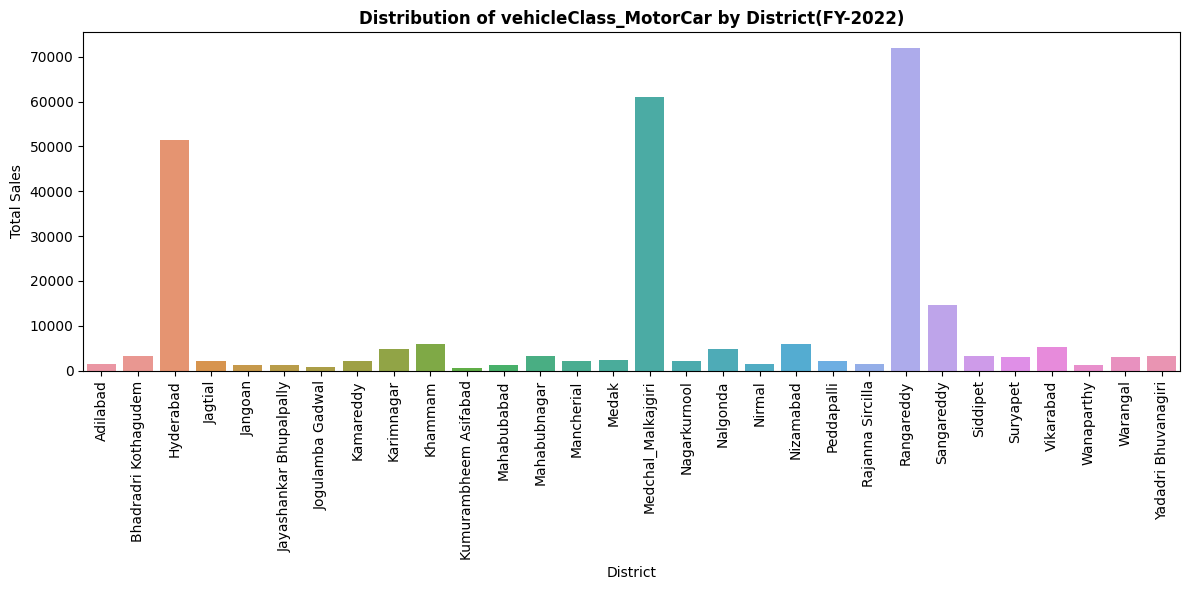

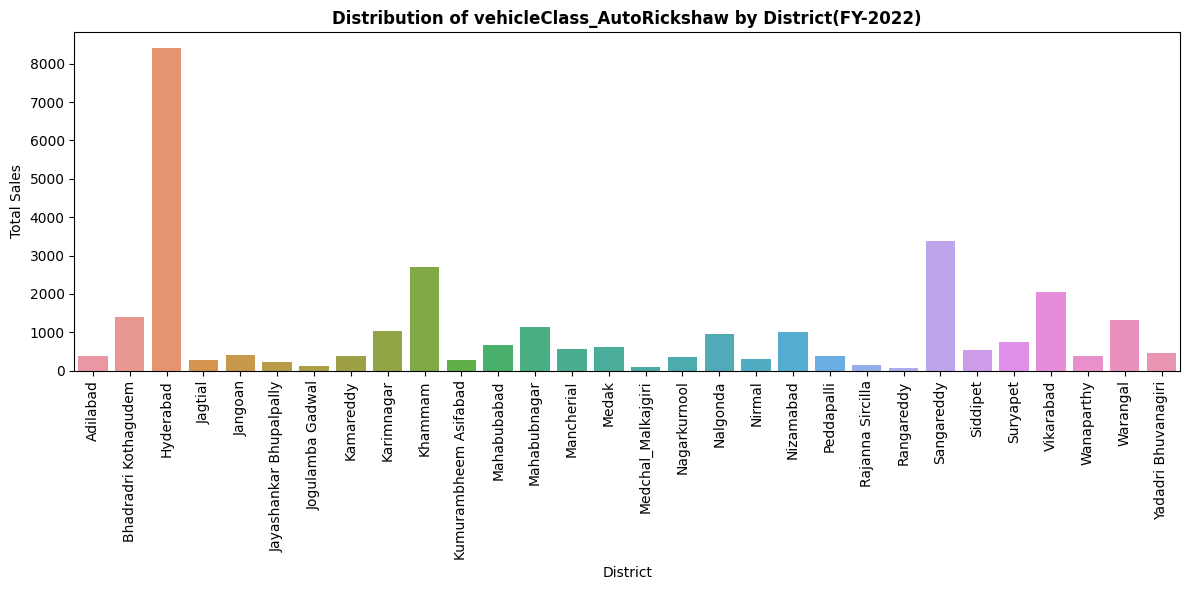

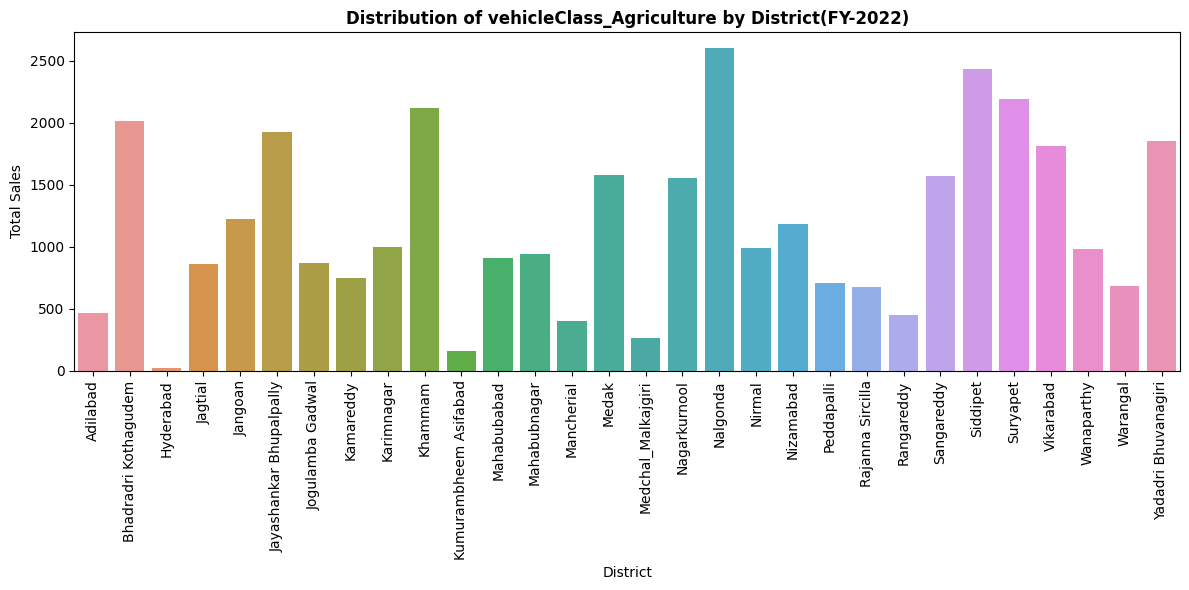

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

transport=pd.read_csv('fact_transport.csv')
districts=pd.read_csv('dim_districts.csv')
df=transport.merge(districts,on='dist_code',how='left')
df['month']=pd.to_datetime(df['month'],format='%Y-%m-%d')
df=df[(df['month']>='2022-04-01') & (df['month']<='2023-03-01')]
vehicle_classes=['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture']
for vehicle_class in vehicle_classes:
  plt.figure(figsize=(12,6))
  district_vehicle_sales=df.groupby('district')[vehicle_classes].sum().reset_index()
  sns.barplot(data=district_vehicle_sales,x='district',y=vehicle_class)

  plt.xlabel("District")
  plt.ylabel("Total Sales")
  plt.title(f'Distribution of {vehicle_class} by District(FY-2022)',fontweight='bold')
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()



**Note** : Here we can see that the predominant class for each and every district is MotorCycle Vehicle class.

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1569: FutureWarning: Passing 'suffixes' which cause duplicate columns {'district_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


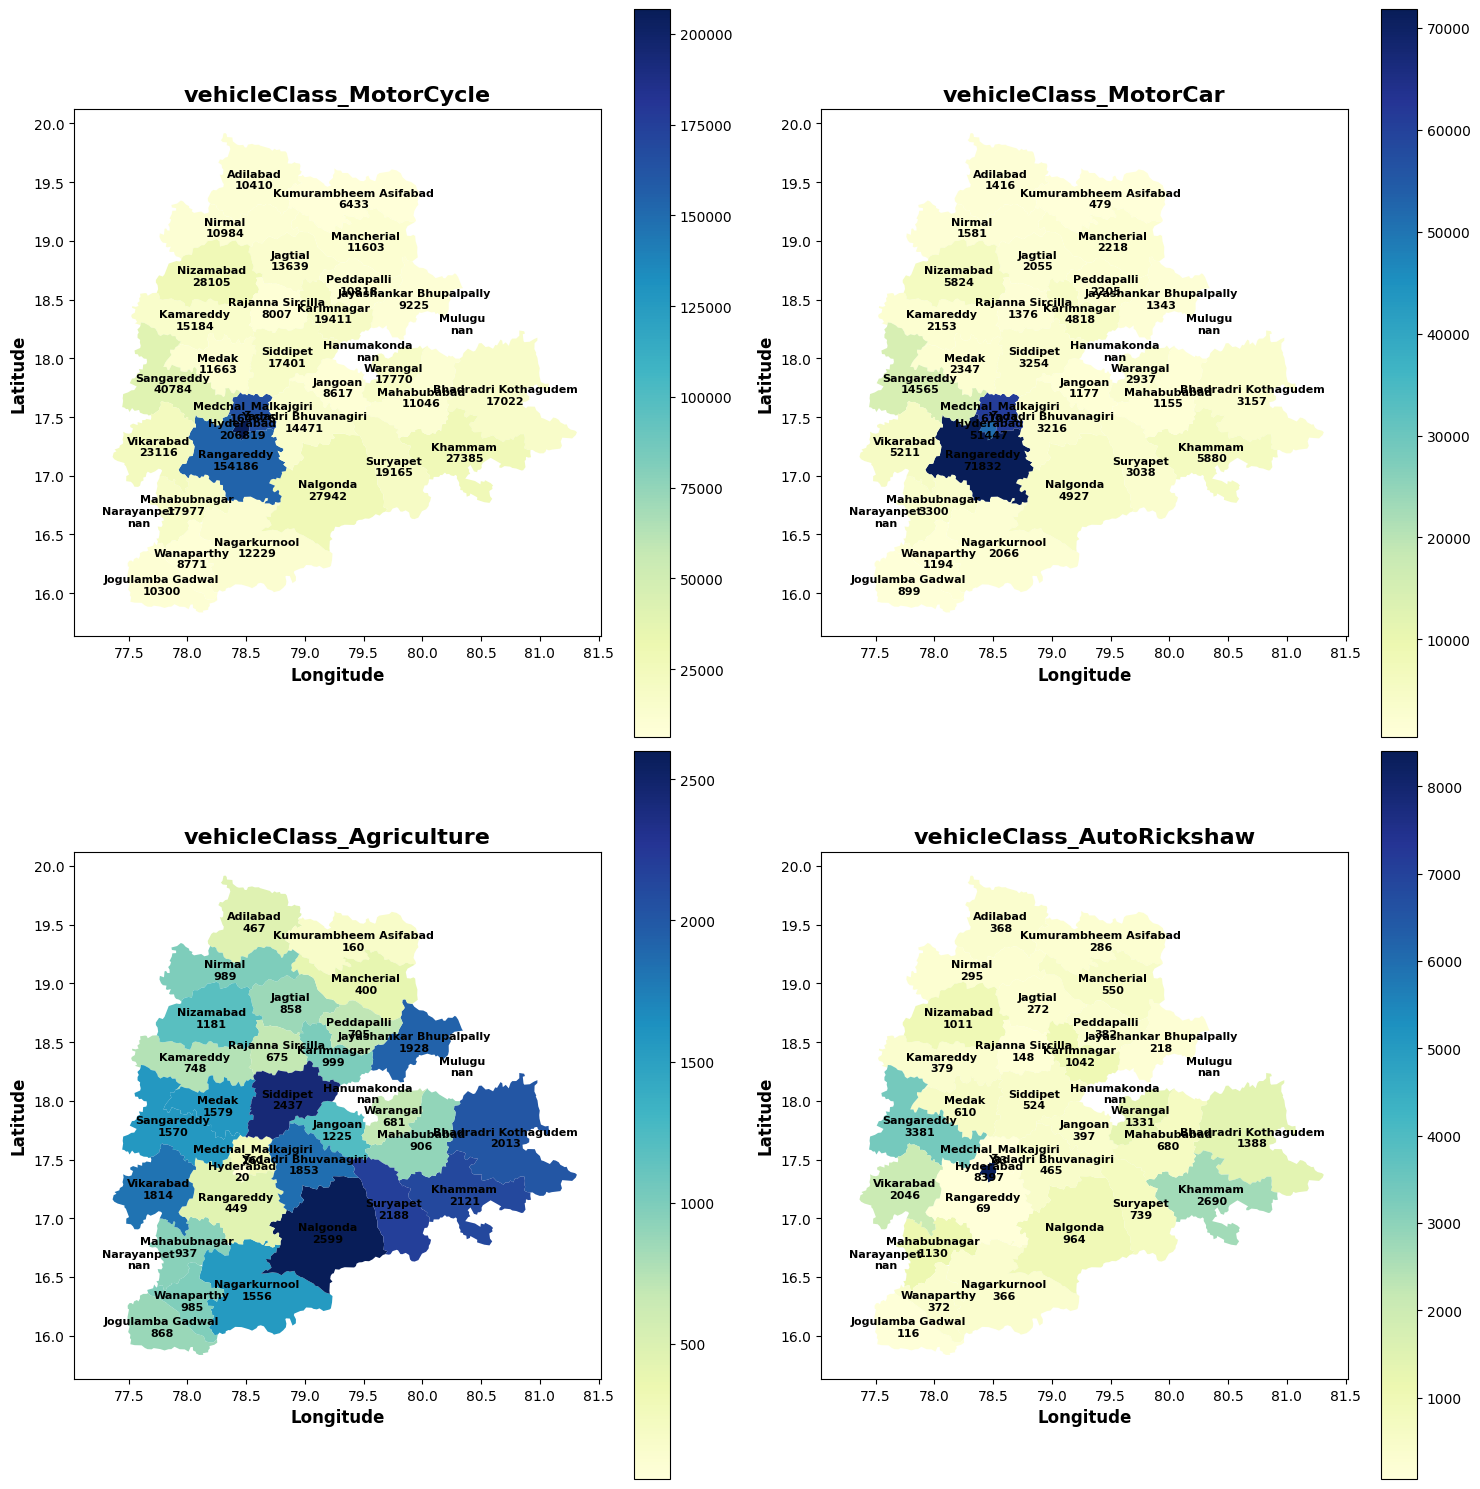

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

dim_districts_df = pd.read_csv('dim_districts.csv')
fact_transport_df = pd.read_csv('fact_transport.csv')

df = fact_transport_df.merge(dim_districts_df, on='dist_code', how='left')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')
df = df[(df['month'] >= '2022-04-01') & (df['month'] <= '2023-03-01')]

vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_Agriculture', 'vehicleClass_AutoRickshaw']

gdf = gpd.read_file('telangana_district_map.json')


fig, axes = plt.subplots(2, 2, figsize=(15, 15))


for idx, (vehicle_class, ax) in enumerate(zip(vehicle_classes, axes.flatten()), start=1):

    district_vehicle_sales = df.groupby('district')[vehicle_class].sum().reset_index()

    gdf = gdf.merge(district_vehicle_sales, left_on='New_Distri', right_on='district', how='left')

    gdf.boundary.plot(ax=ax, color='black', linewidth=0)
    gdf.plot(column=vehicle_class, cmap='YlGnBu', ax=ax, legend=True)

    ax.set_xlabel('Longitude', fontsize=12,fontweight='bold')
    ax.set_ylabel('Latitude', fontsize=12,fontweight='bold')
    ax.set_title(f'{vehicle_class}',fontsize=16,fontweight='bold')

    for x, y, label, value in zip(
        gdf.geometry.centroid.x,
        gdf.geometry.centroid.y,
        gdf['New_Distri'],
        gdf[vehicle_class]
    ):
        ax.annotate(
            f'{label}\n{value:.0f}',
            xy=(x, y),
            fontsize=8,
            ha='center',
            va='center',
            color='black',
            fontweight='bold'
        )
plt.tight_layout()
plt.show()


**7. List down the top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021? (Consider and compare categories: Petrol, Diesel and Electric)**



---
Top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021


---



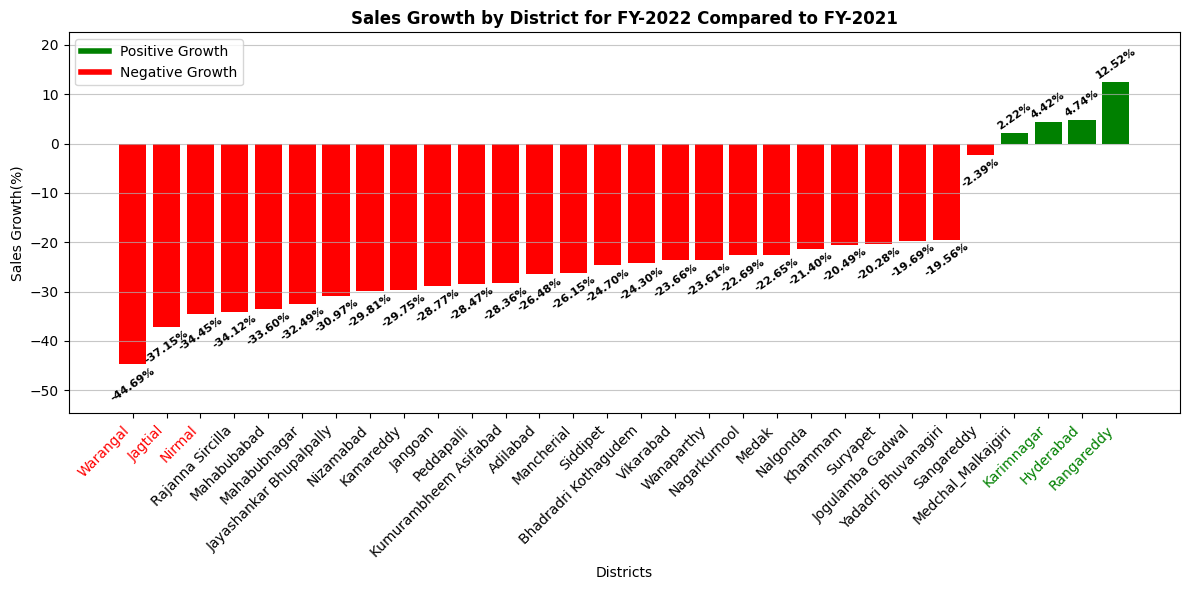

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

transport=pd.read_csv('fact_transport.csv')
districts=pd.read_csv('dim_districts.csv')

df1=transport.merge(districts,on='dist_code',how='left')
df=df1[['month','district','fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].copy()
df['total']=df['fuel_type_petrol']+df['fuel_type_diesel']+df['fuel_type_electric']
df['month']=pd.to_datetime(df['month'],format='%Y-%m-%d')
fy_2021=df[(df['month']>='2021-04-01') & (df['month']<='2022-03-01')]
fy_2022=df[(df['month']>='2022-04-01') & (df['month']<='2023-03-01')]
sales_2021=fy_2021.groupby('district')['total'].sum()
sales_2022=fy_2022.groupby('district')['total'].sum()
sales_growth=((sales_2022-sales_2021)/sales_2021)*100
sales_growth_sorted=sales_growth.sort_values()

colors=['red' if growth<0 else 'green' for growth in sales_growth_sorted]
plt.figure(figsize=(12,6))
bars=plt.bar(sales_growth_sorted.index,sales_growth_sorted,color=colors)

plt.xlabel('Districts')
plt.ylabel("Sales Growth(%)")
plt.title('Sales Growth by District for FY-2022 Compared to FY-2021',fontweight='bold')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='-',alpha=0.7)
plt.legend(handles=[plt.Line2D([0],[0],color='green',lw=4,label='Positive Growth'),
           plt.Line2D([0],[0],color='red',lw=4,label='Negative Growth')])


for bar in bars:
  height=bar.get_height()
  va='bottom' if height>=0 else 'top'
  offset=1 if height>=0 else -1
  plt.annotate(f'{height:.2f}%',(bar.get_x()+bar.get_width()/2,height),ha='center',va=va,xytext=(0,offset),
               textcoords='offset points',fontsize=8,rotation=35,fontweight='bold')

plt.ylim(min(sales_growth_sorted)-10,max(sales_growth_sorted)+10)

ax=plt.gca()
labels=ax.get_xticklabels()
for i,label in enumerate(labels):
  if i<3:
    label.set_color('red')
  elif i>=len(labels)-3:
    label.set_color('green')
plt.tight_layout()
plt.show()

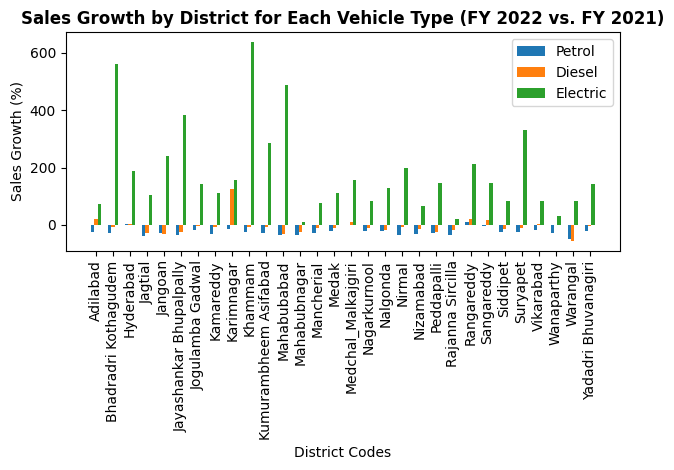

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dim_districts_df=pd.read_csv("dim_districts.csv")
fact_transport_df=pd.read_csv("fact_transport.csv")
df1 = fact_transport_df.merge(dim_districts_df, on='dist_code', how='left')
df = df1[['month', 'district', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].copy()
df['total']=df['fuel_type_petrol']+df['fuel_type_diesel']+df['fuel_type_electric']
df['month']=pd.to_datetime(df['month'],format='%Y-%m-%d')
fy_2021=df[(df['month']>='01-04-2021')&(df['month']<='01-03-2022')]
fy_2022=df[(df['month']>='01-04-2022')&(df['month']<='01-03-2023')]
sales_2021=fy_2021.groupby('district')['total'].sum()
sales_2022=fy_2022.groupby('district')['total'].sum()
sales_growth=((sales_2022-sales_2021)/sales_2021)*100
bottom_3=sales_growth.sort_values(ascending=True).head(3)
top_3=sales_growth.sort_values(ascending=False).head(3)
sales_growth_sorted=sales_growth.sort_values()

plt.figure()
bar_width = 0.2
index = range(len(sales_growth))

sales_2021_1 = fy_2021.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()
sales_2022_1= fy_2022.groupby('district')[['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].sum()

sales_growth_1 = ((sales_2022_1 - sales_2021_1) / sales_2021_1) * 100

plt.bar(index, sales_growth_1['fuel_type_petrol'], bar_width, label='Petrol', align='center')
plt.bar([i + bar_width for i in index], sales_growth_1['fuel_type_diesel'], bar_width, label='Diesel', align='center')
plt.bar([i + 2 * bar_width for i in index], sales_growth_1['fuel_type_electric'], bar_width, label='Electric', align='center')

plt.xlabel('District Codes')
plt.ylabel('Sales Growth (%)')
plt.title('Sales Growth by District for Each Vehicle Type (FY 2022 vs. FY 2021)',fontweight='bold')
plt.xticks([i + bar_width for i in index], sales_growth.index,rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



---

*Highest to lowest vehicle sales growth during FY 2022 compared to FY 2021*

---



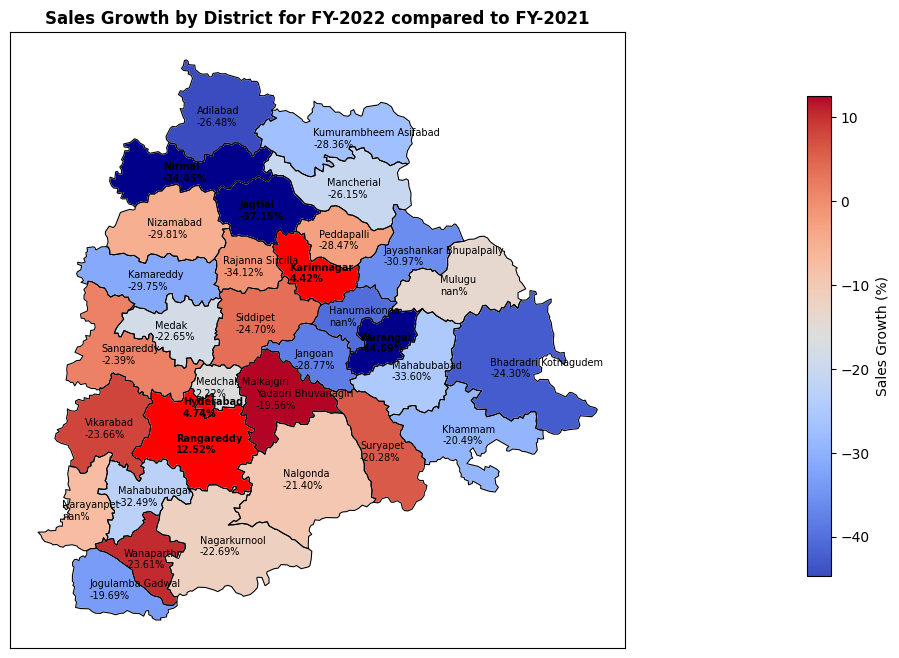

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

transport = pd.read_csv('fact_transport.csv')
districts = pd.read_csv('dim_districts.csv')
gdf = gpd.read_file("telangana_district_map.json")

df1 = transport.merge(districts, on='dist_code', how='left')
df = df1[['month', 'district', 'fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric']].copy()
df['total'] = df['fuel_type_petrol'] + df['fuel_type_diesel'] + df['fuel_type_electric']
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')
fy_2021 = df[(df['month'] >= '2021-04-01') & (df['month'] <= '2022-03-01')]
fy_2022 = df[(df['month'] >= '2022-04-01') & (df['month'] <= '2023-03-01')]
sales_2021 = fy_2021.groupby('district')['total'].sum()
sales_2022 = fy_2022.groupby('district')['total'].sum()
sales_growth = ((sales_2022 - sales_2021) / sales_2021) * 100
sales_growth = sales_growth.sort_values(ascending=False)

gdf = gdf.merge(sales_growth, left_on='New_Distri', right_index=True, how="left")

fig, ax = plt.subplots(figsize=(12, 8))
gdf.boundary.plot(ax=ax, color='black', linewidth=0.8)

gdf[gdf['New_Distri'].isin(sales_growth.head(3).index)].plot(ax=ax, color='red', edgecolor='white', alpha=1)
gdf[gdf['New_Distri'].isin(sales_growth.tail(3).index)].plot(ax=ax, color='darkblue', edgecolor='white', alpha=1)

gdf[~gdf['New_Distri'].isin(sales_growth.head(3).index) &
    ~gdf['New_Distri'].isin(sales_growth.tail(3).index)].plot(ax=ax, cmap='coolwarm', edgecolor='white', alpha=1)


cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=sales_growth.min(), vmax=sales_growth.max()))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Sales Growth (%)')

ax.set_title('Sales Growth by District for FY-2022 compared to FY-2021', fontsize=12, fontweight='bold')

for x, y, label, growth_value in zip(gdf.geometry.centroid.x,
                                      gdf.geometry.centroid.y,
                                      gdf['New_Distri'],
                                      gdf['total']):
    fontweight = 'bold' if label in sales_growth.head(3).index or label in sales_growth.tail(3).index else 'normal'
    ax.annotate(f'{label}\n{growth_value:.2f}%', xy=(x - 0.17, y - 0.08), fontsize=7, fontweight=fontweight, color='black')

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
plt.show()


**Ts-Ipass**



**8. List down the top 5 sectors that have witnessed the most significant investments in FY 2022.**



---
Top 5 sectors that have witnessed the most significant investments in FY 2022.


---



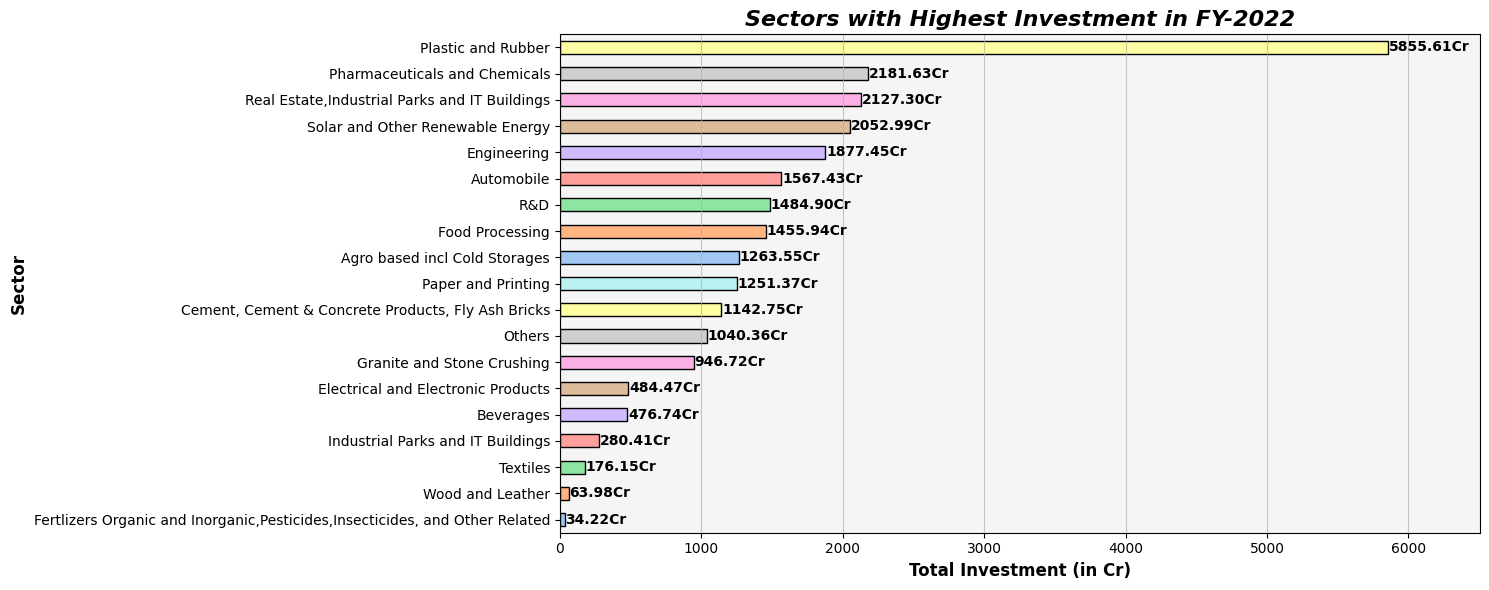

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('fact_TS_iPASS.csv')
df['month']=pd.to_datetime(df['month'],format='%d-%m-%Y')
fy_2022=df[(df['month']>='2022-04-01') & (df['month']<='2023-03-01')]
investment_fy_2022=fy_2022.groupby('sector')['investment in cr'].sum()
investment_fy_2022=investment_fy_2022.sort_values(ascending=True)

plt.figure(figsize=(15,6))
colors=sns.color_palette('pastel')
ax=investment_fy_2022.plot(kind='barh',color=colors,edgecolor='black')
plt.title("Sectors with Highest Investment in FY-2022",fontsize=16,fontweight='bold',fontstyle='italic')
plt.xlabel('Total Investment (in Cr)',fontsize=12,fontweight='bold')
plt.ylabel('Sector',fontsize=12,fontweight='bold')

for p in ax.patches:
  width=p.get_width()
  plt.text(width+5,p.get_y()+p.get_height()/2,f'{width:.2f}Cr',ha='left',va='center',fontsize=10,fontweight='bold',color='black')

plt.xlim(0,max(investment_fy_2022)+650)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='x',linestyle='-',alpha=0.7)
plt.tight_layout()
plt.show()


**9. List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? What factors could have led to the substantial investments in these particular districts?**



---
*Top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022 (Bar Graph)*


---



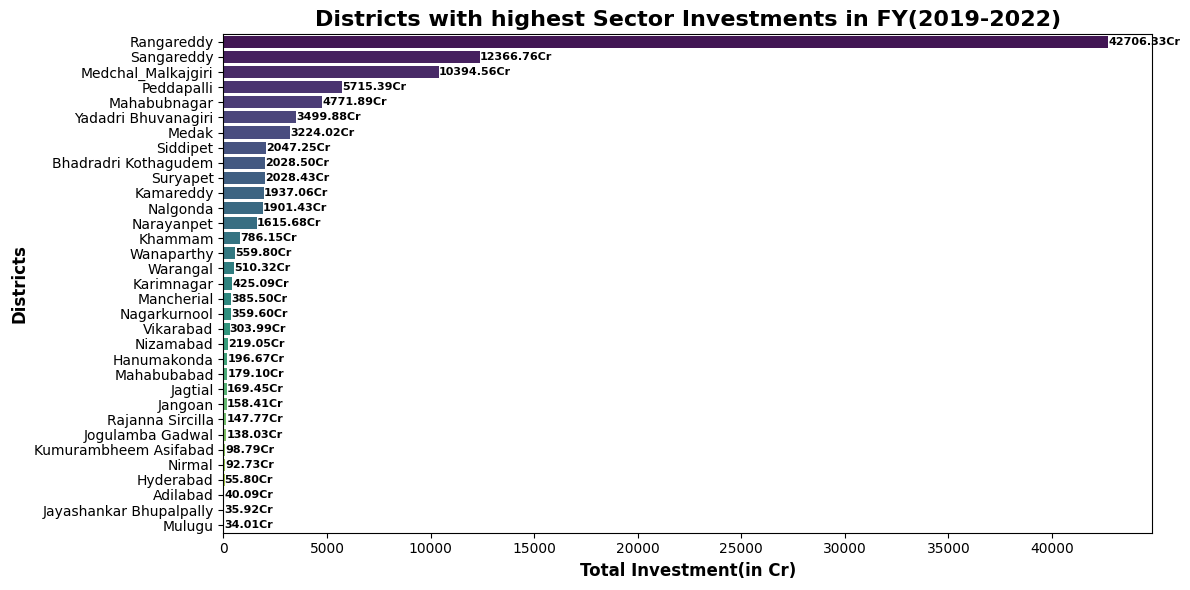

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
districts=pd.read_csv("dim_districts.csv")
ipass=pd.read_csv("fact_TS_iPASS.csv")
df=ipass.merge(districts,on='dist_code',how='left')
df['month']=pd.to_datetime(df['month'])
investment_by_district_sector=df.groupby(['district','sector'])['investment in cr'].sum().reset_index()
investment_by_district=investment_by_district_sector.groupby('district')['investment in cr'].sum().reset_index()
investment_by_district=investment_by_district.drop_duplicates(subset='district')
sorted_districts=investment_by_district.sort_values(by='investment in cr',ascending=False)

plt.figure(figsize=(12,6))
ax=sns.barplot(data=sorted_districts,x='investment in cr',y='district',palette='viridis')
plt.xlabel('Total Investment(in Cr)',fontsize=12,fontweight='bold')
plt.ylabel('Districts',fontsize=12,fontweight='bold')
plt.title('Districts with highest Sector Investments in FY(2019-2022)',fontsize=16,fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
  width=p.get_width()
  plt.text(width+5,p.get_y()+p.get_height()/2,f'{width:.2f}Cr',ha='left',va='center',fontsize=8,fontweight='bold',color='black')
plt.tight_layout()
plt.show()



---
Top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022 (Plotting on Telangana Map)




---



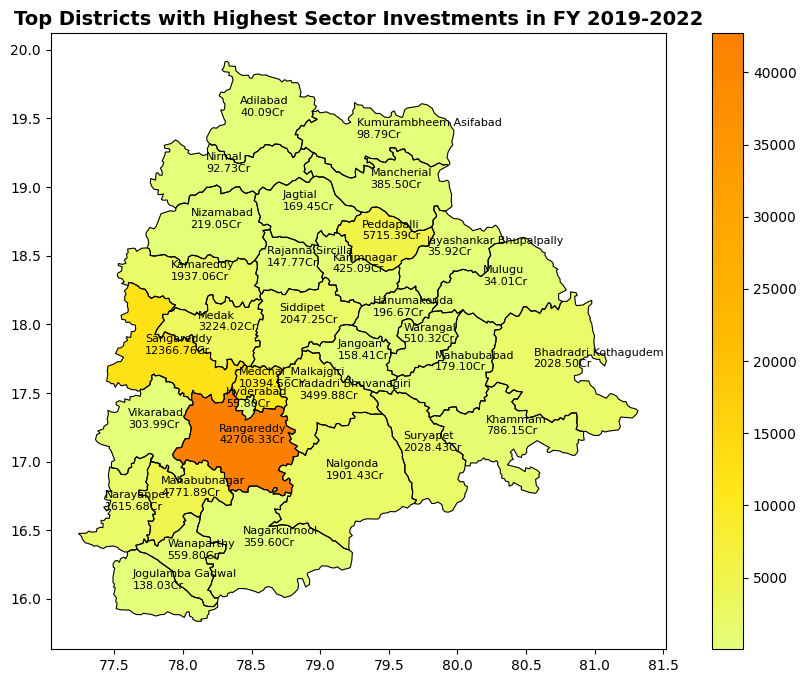

In [ ]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
districts=pd.read_csv("dim_districts.csv")
ipass=pd.read_csv("fact_TS_iPASS.csv")
gdf=gpd.read_file("telangana_district_map.json")

df=ipass.merge(districts,on='dist_code',how='left')
df['month']=pd.to_datetime(df['month'])
investment_by_district_sector=df.groupby(['district','sector'])['investment in cr'].sum().reset_index()
investment_by_district=investment_by_district_sector.groupby('district')['investment in cr'].sum().reset_index()
investment_by_district=investment_by_district.drop_duplicates(subset='district')
sorted_districts=investment_by_district.sort_values(by='investment in cr',ascending=False)

gdf=gdf.merge(sorted_districts,left_on='New_Distri',right_on='district',how='left')
fig,ax=plt.subplots(figsize=(12,8))
gdf.boundary.plot(ax=ax,color='black',linewidth=0.8)
gdf.plot(column='investment in cr',cmap='Wistia',ax=ax,legend=True)
ax.set_title("Top Districts with Highest Sector Investments in FY 2019-2022",fontsize=14,fontweight='bold')
for x,y,label,investment_value in zip(gdf.geometry.centroid.x,
                                      gdf.geometry.centroid.y,
                                      gdf['New_Distri'],
                                      gdf['investment in cr']):
  ax.annotate(f'{label}\n{investment_value:.2f}Cr',xy=(x-0.15,y),fontsize=8,color='black')
plt.show()


**10. Is there any relationship between district investments, vehicles sales and stamps revenue within the same district between FY 2021 and 2022?**



---

*Relationship between district investments, vehicles sales and stamps revenue within the same district between FY 2021 and 2022*

---



<ipython-input-101-5d66799cd499>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_documnets_fy_2021_2022.fillna(0,inplace=True)
<ipython-input-101-5d66799cd499>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vehicles_fy_2021_2022.fillna(0,inplace=True)
<ipython-input-101-5d66799cd499>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipass_fy_2021_2022.fillna(0,inplace=True)


Text(0.5, 1.0, 'Correlation between stamps revenue,vehicle sales, district investments')

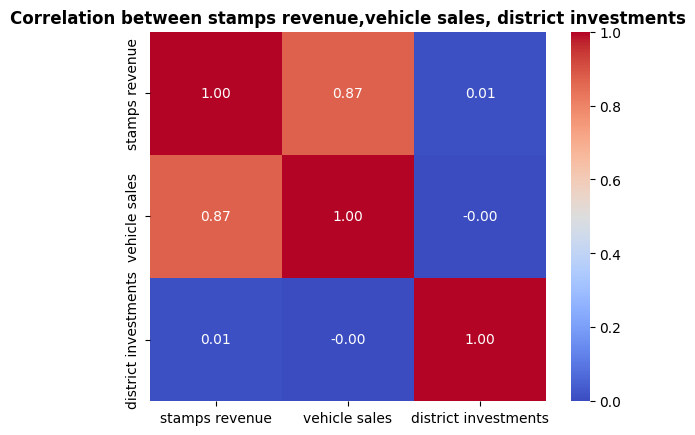

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


ipass=pd.read_csv("fact_TS_iPASS.csv")
df_documents=pd.read_csv('fact_stamps.csv')
df_vehicles=pd.read_csv('fact_transport.csv')

df_documents['month']=pd.to_datetime(df_documents['month'])
df_vehicles['month']=pd.to_datetime(df_vehicles['month'])
ipass['month']=pd.to_datetime(ipass['month'])

df_documnets_fy_2021_2022=df_documents[(df_documents['month']>='2021-04-01') & (df_documents['month']<='2023-03-01')]
df_vehicles_fy_2021_2022=df_vehicles[(df_vehicles['month']>='2021-04-01') & (df_vehicles['month']<='2023-03-01')]
ipass_fy_2021_2022=ipass[(ipass['month']>='2021-04-01') & (ipass['month']<='2023-03-01')]

df_documnets_fy_2021_2022.fillna(0,inplace=True)
df_vehicles_fy_2021_2022.fillna(0,inplace=True)
ipass_fy_2021_2022.fillna(0,inplace=True)

merged_data=pd.merge(df_documnets_fy_2021_2022,df_vehicles_fy_2021_2022,on=['dist_code','month'])
merged_data=pd.merge(merged_data,ipass_fy_2021_2022,on=['dist_code','month'])

merged_data['stamps revenue']=merged_data['documents_registered_rev']+merged_data['estamps_challans_rev']
merged_data['vehicle sales']=merged_data['fuel_type_petrol']+merged_data['fuel_type_diesel']+merged_data['fuel_type_electric']+merged_data['fuel_type_others']
merged_data['district investments']=merged_data['investment in cr']

correlation_matrix=merged_data[['stamps revenue','vehicle sales','district investments']].corr()


plt.figure()
sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation between stamps revenue,vehicle sales, district investments',fontsize=12,fontweight='bold')

**11. Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?**



---

*Total investment of particular sector in multiple districts*

---



<ipython-input-102-609d331932e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fy_2021_2022['investment in cr']=pd.to_numeric(df_fy_2021_2022['investment in cr'],errors='coerce')


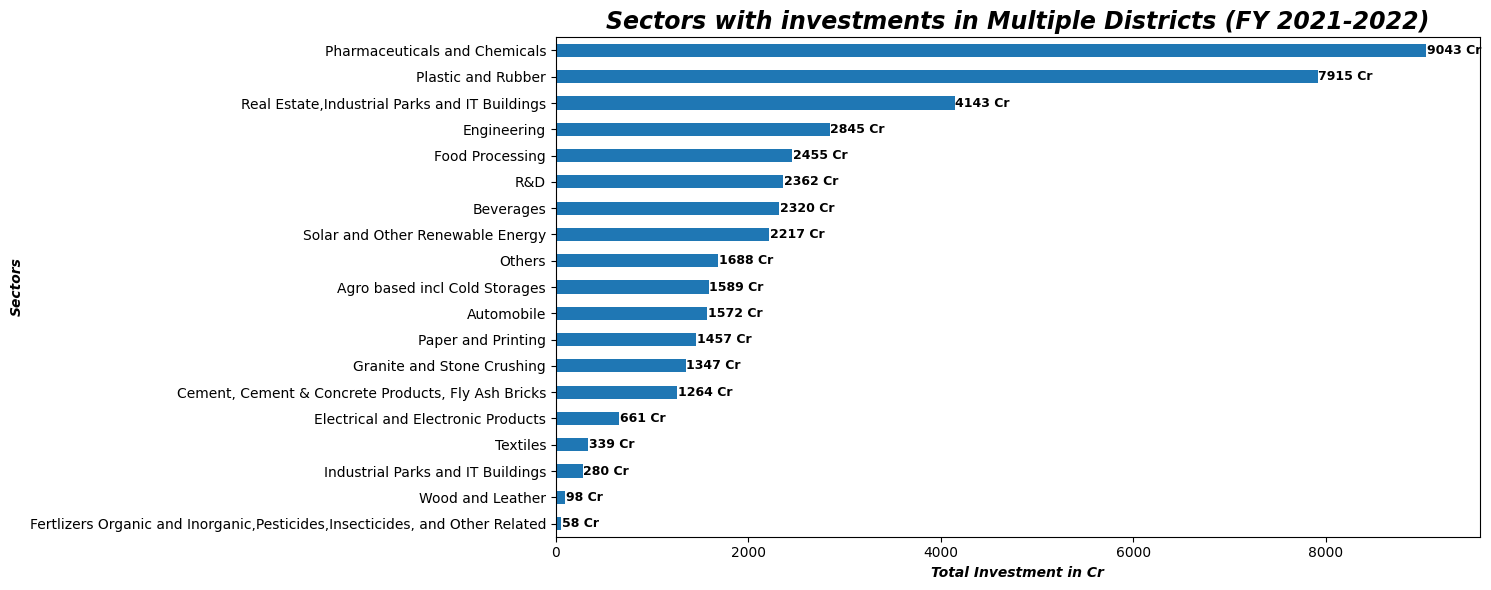

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("fact_TS_iPASS.csv")
df['month']=pd.to_datetime(df['month'])
df_fy_2021_2022=df[(df['month']>='01-04-2021') & (df['month']<='01-03-2023')]
df_fy_2021_2022['investment in cr']=pd.to_numeric(df_fy_2021_2022['investment in cr'],errors='coerce')

sectors_investment_sum=df_fy_2021_2022.groupby('sector')['investment in cr'].sum().dropna()
sectors_districts_investment=df_fy_2021_2022.groupby('sector')['dist_code'].apply(list)
sectors_with_multiple_districts=sectors_districts_investment[sectors_districts_investment.apply(len)>1]

plt.figure(figsize=(15,6))
ax=sectors_investment_sum.sort_values(ascending=True).plot(kind='barh')
plt.title("Sectors with investments in Multiple Districts (FY 2021-2022)",fontweight='bold',fontsize=17,fontstyle='italic')
plt.xlabel("Total Investment in Cr",fontweight='bold',fontsize=10,fontstyle='italic')
plt.ylabel("Sectors",fontweight='bold',fontsize=10,fontstyle='italic')
for p in ax.patches:
  width=p.get_width()
  plt.text(width+5,p.get_y()+p.get_height()/2,f'{width:.0f} Cr',ha='left',va='center',fontsize=9,fontweight='bold',color='black')
plt.xlim(0,9600)
plt.tight_layout()
plt.show()







---
*Total number of times investments took place in a particular district*


---



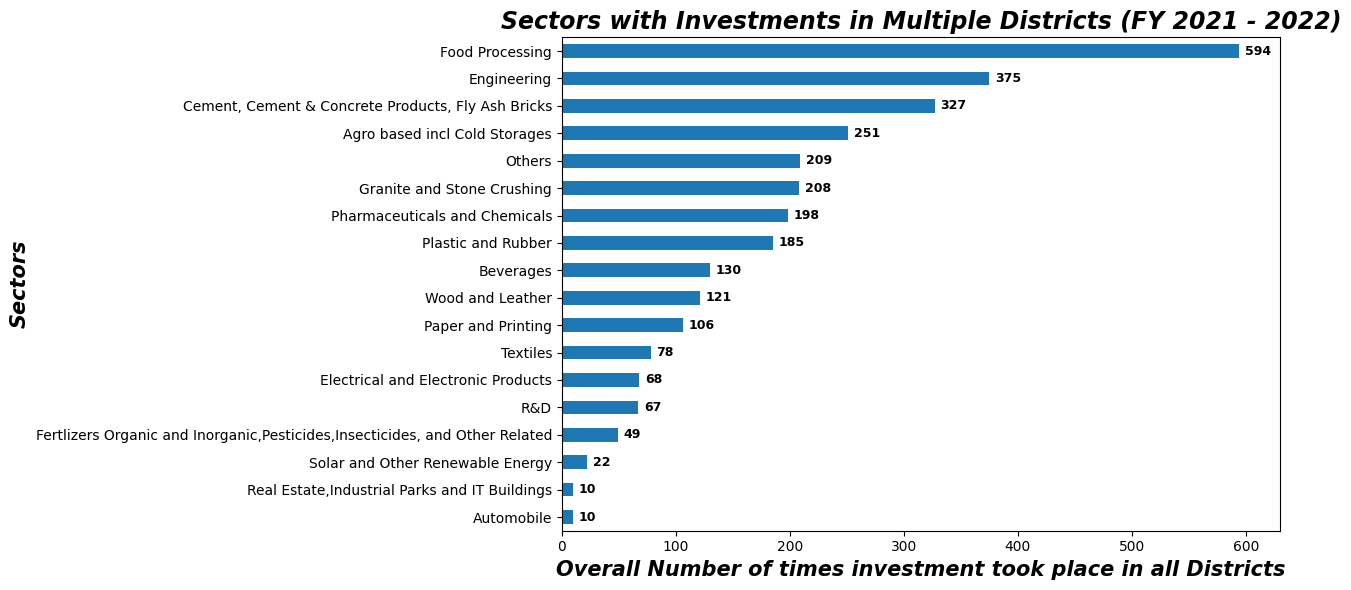

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fact_TS_iPASS.csv')
df['month'] = pd.to_datetime(df['month'],format='%d-%m-%Y')
df_fy_2021_2022 = df[(df['month'] >= '01-04-2021') & (df['month'] <= '01-03-2023')]
sectors_investment_counts = df_fy_2021_2022.groupby('sector')['investment in cr'].count()
sectors_districts_investment = df_fy_2021_2022.groupby('sector')['dist_code'].apply(list)
sectors_with_multiple_districts = sectors_districts_investment[sectors_districts_investment.apply(len) > 1]
plt.figure(figsize=(13,6))
ax=sectors_with_multiple_districts.apply(len).sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Sectors',fontweight='bold',fontsize=15,fontstyle='italic')
plt.xlabel('Overall Number of times investment took place in all Districts',fontweight='bold',fontsize=15,fontstyle='italic')
plt.title('Sectors with Investments in Multiple Districts (FY 2021 - 2022)',fontweight='bold',fontsize=17,fontstyle='italic')
plt.xticks()

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{width:.0f}', ha='left', va='center', fontsize=9, fontweight='bold', color='black')

plt.xlim(0,630)
plt.tight_layout()
plt.show()



---
*Number of districts particular sector invested*


---



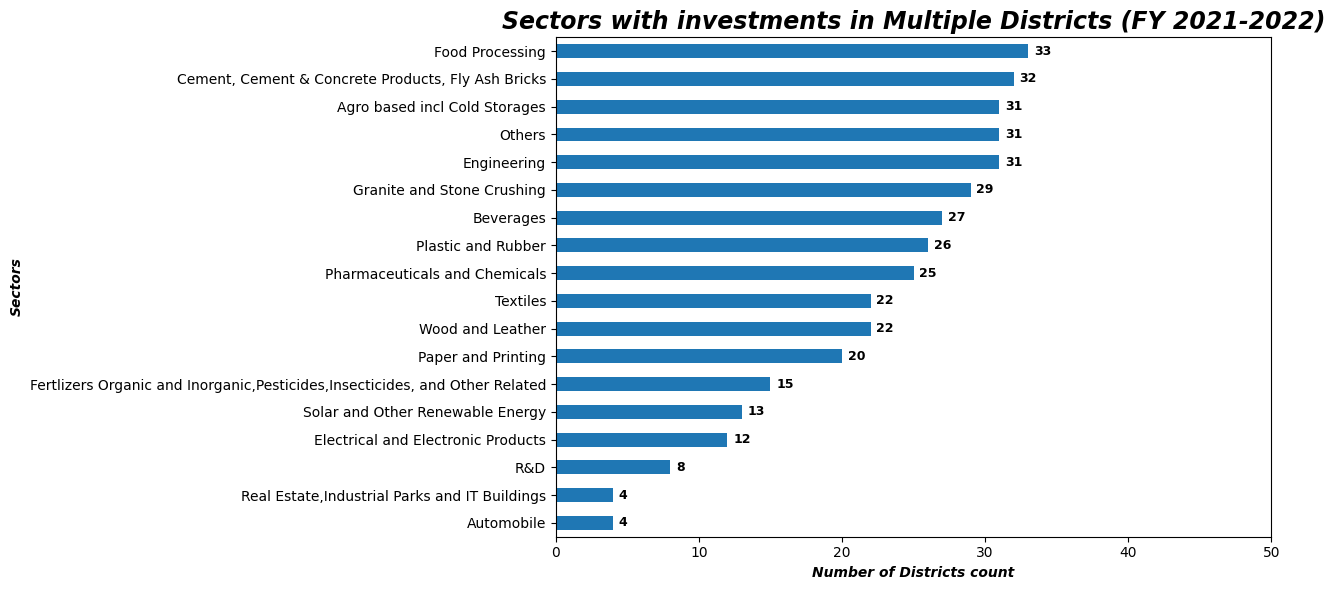

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("fact_TS_iPASS.csv")
df['month']=pd.to_datetime(df['month'],format='%d-%m-%Y')
fy_2021_2022=df[(df['month']>='01-04-2021') & (df['month']<='01-03-2023')]
sectors_districts_investment=fy_2021_2022.groupby('sector')['dist_code'].nunique()

plt.figure(figsize=(13,6))
ax=sectors_districts_investment.sort_values(ascending=True).plot(kind='barh')
plt.title("Sectors with investments in Multiple Districts (FY 2021-2022)",fontweight='bold',fontsize=17,fontstyle='italic')
plt.xlabel("Number of Districts count",fontweight='bold',fontsize=10,fontstyle='italic')
plt.ylabel("Sectors",fontweight='bold',fontsize=10,fontstyle='italic')
#plt.xticks()
for p in ax.patches:
  width=p.get_width()
  plt.text(width+0.4,p.get_y()+p.get_height()/2,f'{width:.0f}',ha='left',va='center',fontsize=9,fontweight='bold',color='black')
plt.xlim(0,50)
plt.tight_layout()
plt.show()




**12. Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? Do certain sectors experience higher investments during particular months?**

<Figure size 1700x600 with 0 Axes>

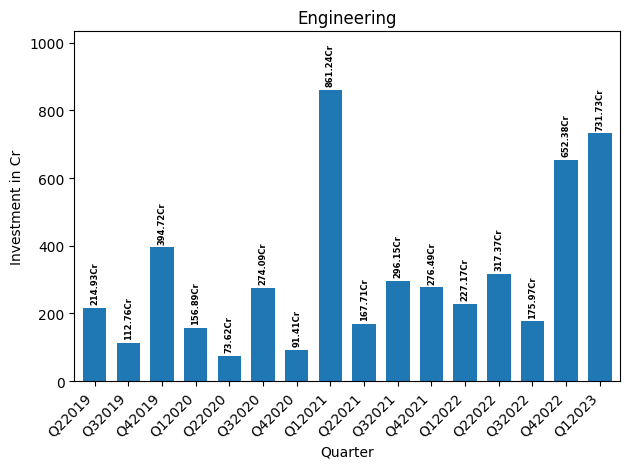

<Figure size 1700x600 with 0 Axes>

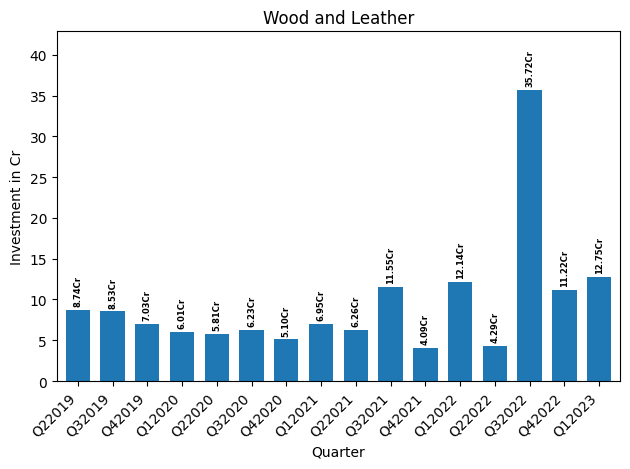

<Figure size 1700x600 with 0 Axes>

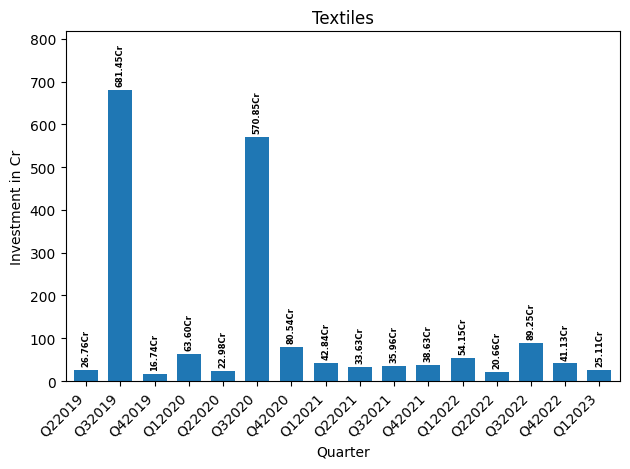

<Figure size 1700x600 with 0 Axes>

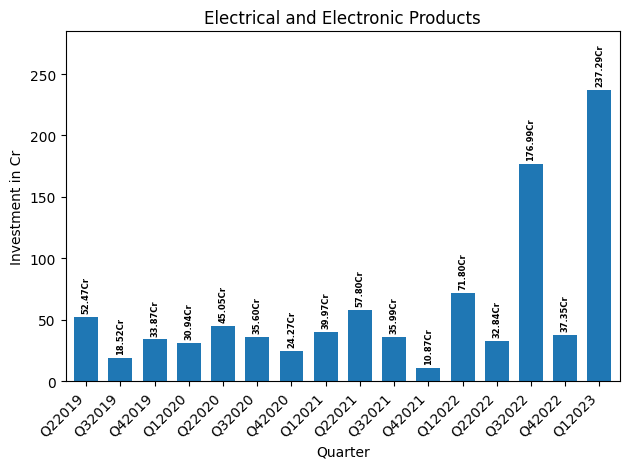

<Figure size 1700x600 with 0 Axes>

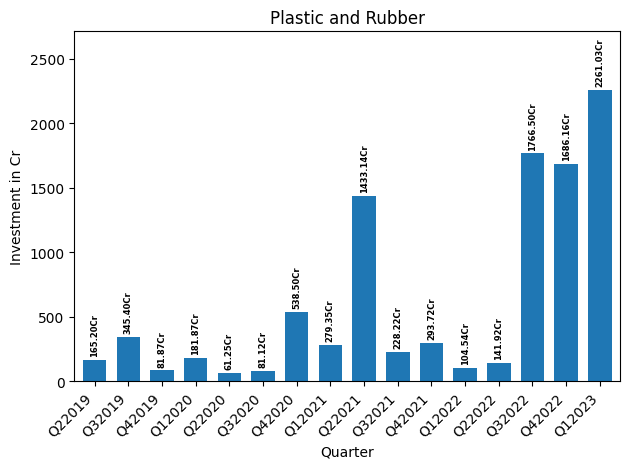

<Figure size 1700x600 with 0 Axes>

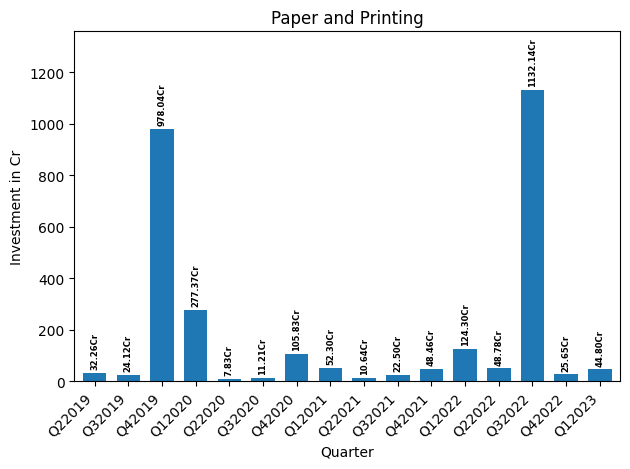

<Figure size 1700x600 with 0 Axes>

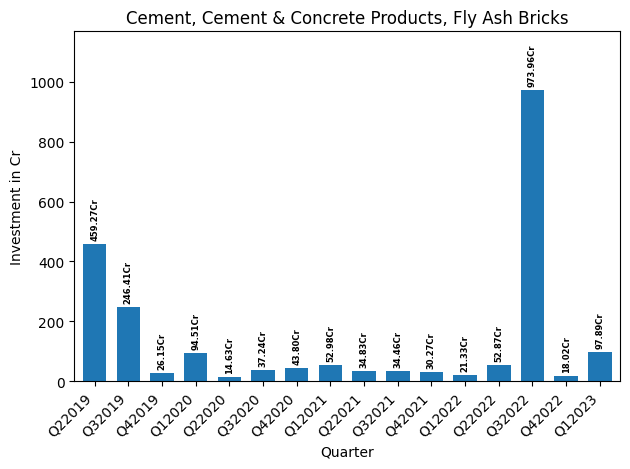

<Figure size 1700x600 with 0 Axes>

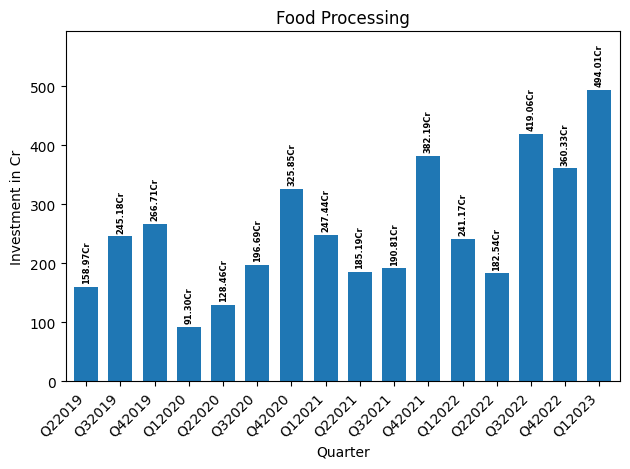

<Figure size 1700x600 with 0 Axes>

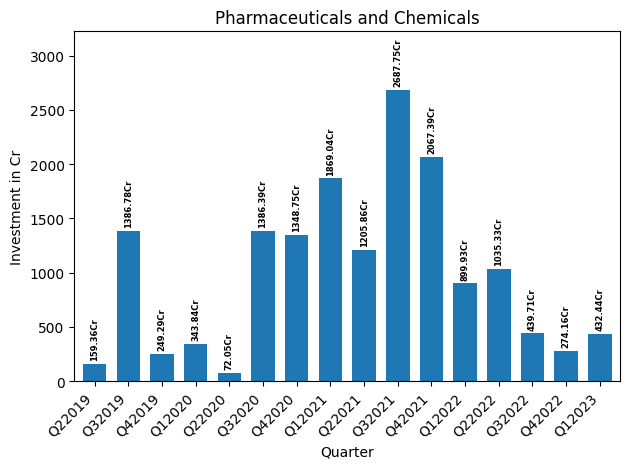

<Figure size 1700x600 with 0 Axes>

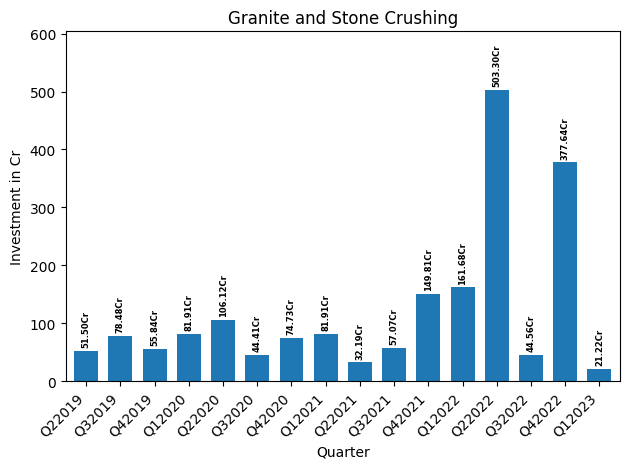

<Figure size 1700x600 with 0 Axes>

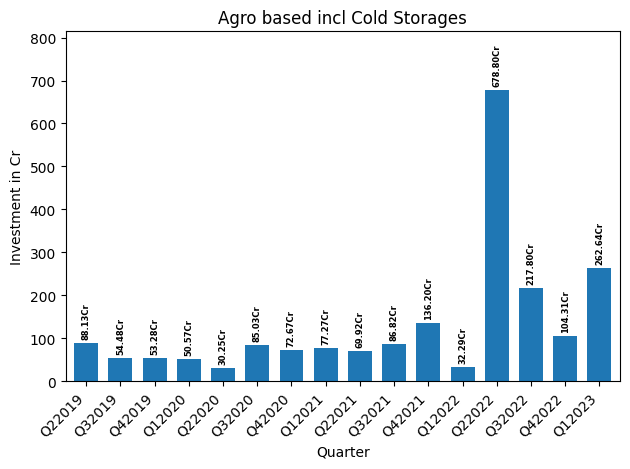

<Figure size 1700x600 with 0 Axes>

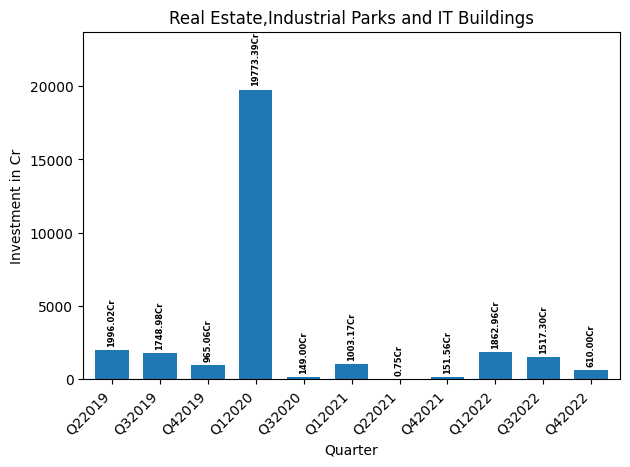

<Figure size 1700x600 with 0 Axes>

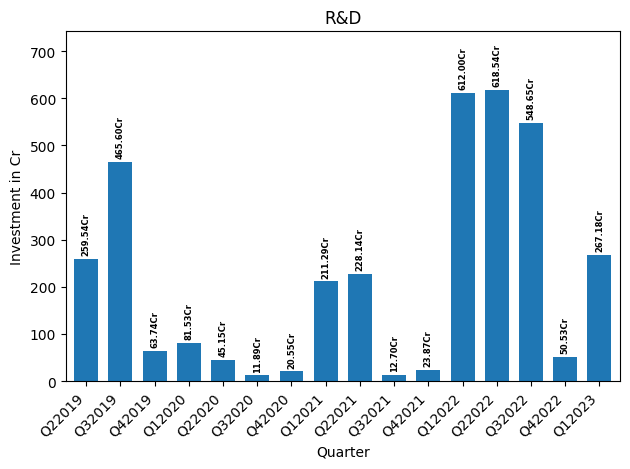

<Figure size 1700x600 with 0 Axes>

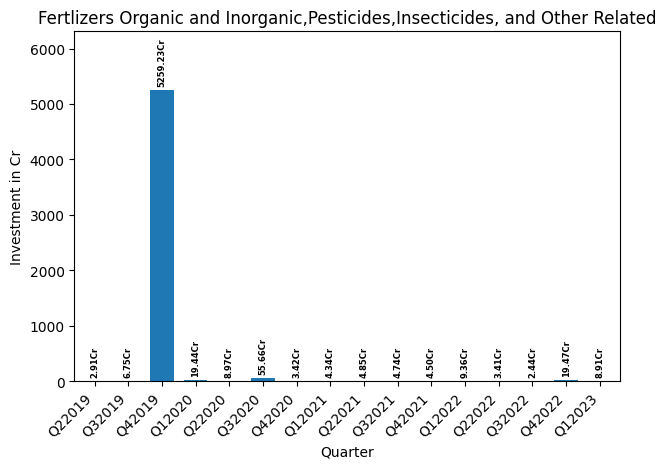

<Figure size 1700x600 with 0 Axes>

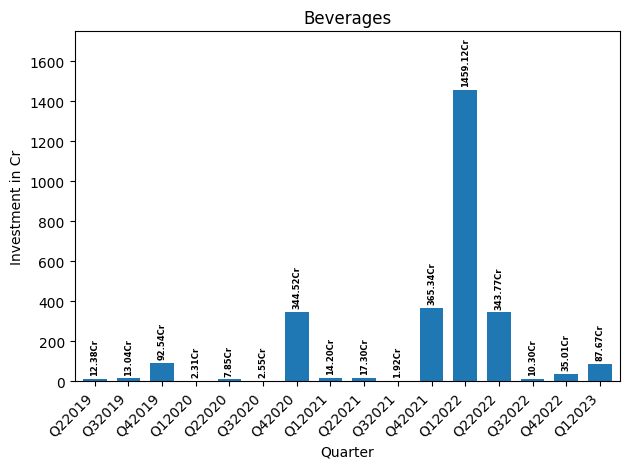

<Figure size 1700x600 with 0 Axes>

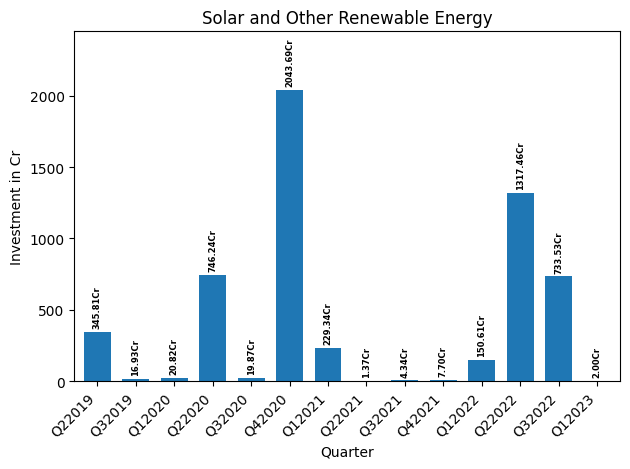

<Figure size 1700x600 with 0 Axes>

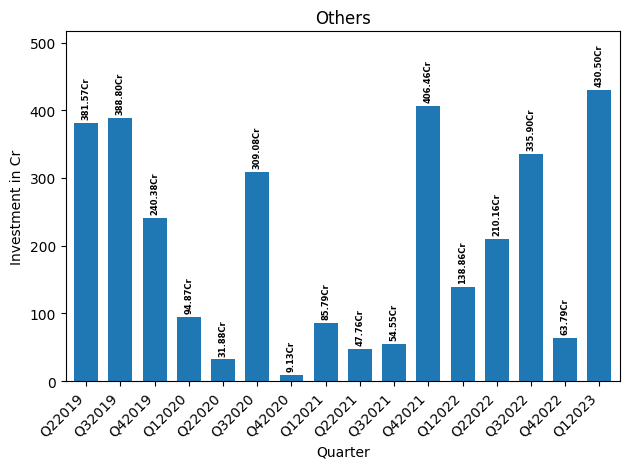

<Figure size 1700x600 with 0 Axes>

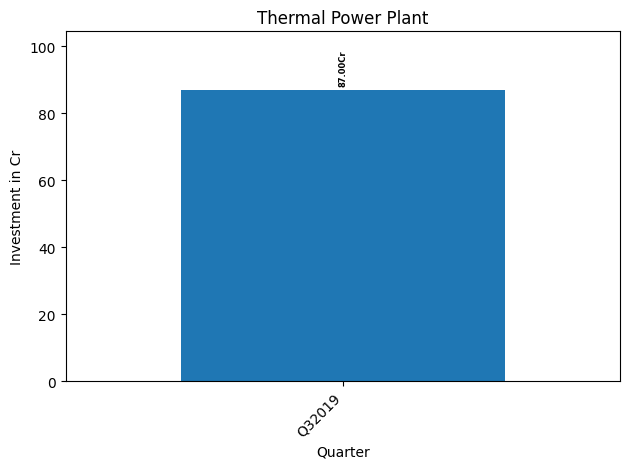

<Figure size 1700x600 with 0 Axes>

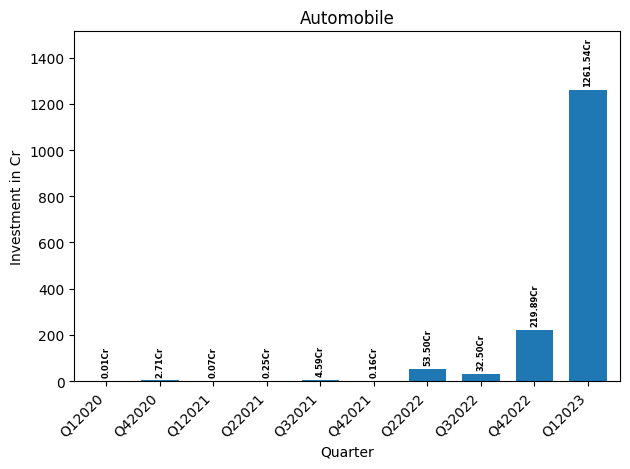

<Figure size 1700x600 with 0 Axes>

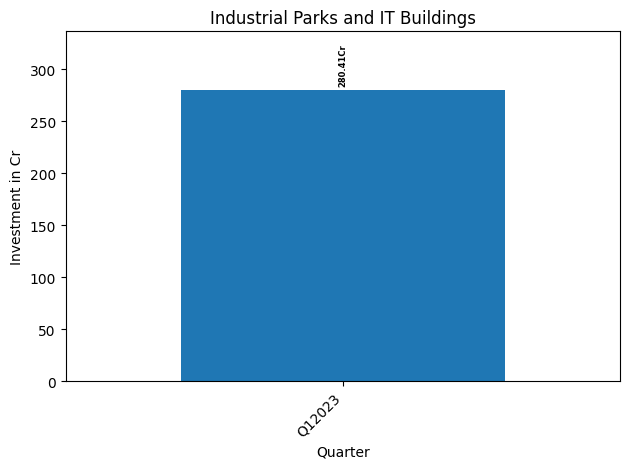

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("fact_TS_iPASS.csv")
df['month'] = pd.to_datetime(df['month'], format='%d-%m-%Y')
df['quarter'] = df['month'].dt.to_period('Q')
investment_trends = df.groupby(['sector', 'quarter'])['investment in cr'].sum().reset_index()
unique_sectors = df['sector'].unique()
x_label_space = 0.5

for sec in unique_sectors:
    df_sector = investment_trends[investment_trends['sector'] == sec]
    plt.figure(figsize=(17, 6))
    ax = df_sector.plot(x='quarter', y='investment in cr', kind="bar", title=sec, width=0.7, legend=False)
    quarter_labels = [f'Q{q.quarter}{q.year}' for q in df_sector['quarter']]
    ax.set_xticklabels(quarter_labels, rotation=45, ha='right')
    plt.subplots_adjust(bottom=x_label_space)
    plt.xlabel('Quarter')
    plt.ylabel('Investment in Cr')
    max_value = df_sector['investment in cr'].max()

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()

        annotation_y = height + max_value * 0.02

        ax.annotate(f'{height:.2f}Cr', (x + width / 2, annotation_y), ha='center', fontsize=6,
                    fontweight='bold', color='black', rotation=90)

    plt.ylim(top=max_value * 1.2)
    plt.tight_layout()
    plt.show()
